## proyecto machine learning 
Gretel De Cuyper

**links**

fuente original dataset:
- https://archive.ics.uci.edu/ml/datasets/adult

**grandes líneas de metodología aplicada**

0. Instalación software

1. Importar librerías   

2. Importar (y en este caso: constituir) dataset   

3. Primera exploración dataset  
3.1. Información 'real world' sobre el dataset   
3.2. Distribución de las variables y su relación con target  
3.2.1. Target: distribución de sus valores  
3.2.2. Variables numéricas  
-- a) distribución de los valores de cada variable  
-- b) distribución de las variables respecto a la target  
3.2.3. Variables categóricas  
-- 3.2.3.1. distribución de los varloes de cada variables  
-- 3.2.3.2. distribución de las variables respecto a la target  

4. Preprocesado dataset  
4.1. FASE 1 : transformar el dataset para su modelling (los puntos siguientes no se tratarán literalmente en el orden dado, pero sí dan un vistazo de las modadilidades de transformación)  
•	4.1.1. Layout  
•	4.1.2. Transformaciones que afectan al contenido/procesamiento  
-- 4.1.2.1. Encoding?  
-- 4.1.2.2. Missing values?  
-- 4.1.2.3. Duplicados?  
•	4.1.3. Peso dataset  
<br>
4.2. FASE 2 : preparación específica del dataset para el modelling  
•	4.2.1. Split X & y  
•	4.2.2. Split train & test  
•	4.2.3. Class Imbalance   
•	4.2.4. Scaling   
   
5. Entrenar algoritmos: 
probar modelos (dividos en grupos por usar datos escalados vs. no) + evaluar + optimizar  
---------------------------MODELOS 'SIMPLES'--------------------:
- logistic regression: básico, cambio hyperparámetros, con cv
- SVM: básico, cambio hyperparámetros, con cv
- KNN: básico, cambio hyperparámetros, con cv
- Naive Bayes: básico, cambio hyperparámetros, con cv
- Decision Tree: básico, cambio hyperparámetros, con cv  
----------------------------------ENSAMBLES-------------------:
- Voting Classifier: básico, cambio hyperparámetros, con cv
- Bagging Classifier: básico, cambio hyperparámetros, con cv
- Pasting Classifier: básico, cambio hyperparámetros, con cv
- Random Forest Classifier: básico, cambio hyperparámetros, con cv
- AdaBoost Classifier: básico, cambio hyperparámetros, con cv
- GradientBoostingClassifier: básico, cambio hyperparámetros, con cv
- XGBoost Classifier: básico, cambio hyperparámetros, con cv
<br>
--------------------------------------------------------------:
- aplicación de Pipeline

6. Seleccionar algoritmo
7. Evaluar algoritmo
8. Optimizar algoritmo
9. Aplicar algoritmo


**inicio proyecto**

# 0. Instalar software

In [154]:
#pip install pandas-summary

In [155]:
#pip install graphing

In [156]:
#!pip install missingno

In [157]:
#pip install sharp

# 1. Importar librerías

In [158]:
#LOAD AMD MANIPULATE DATA
import pandas as pd
from pandas_summary import DataFrameSummary

#CALCULATE WITH DATA (mean, std)
import numpy as np

#ML PREPROCESSING - ANALISIS DE DATOS PREDICTIVO
##encoders
from sklearn.preprocessing import OneHotEncoder
#from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
##scalers
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
##balancers
#from imblearn.over_sampling import SMOTE

#ML PROCESSING
## classification
### linear
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
### regularizacion
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV  #performs automatic tuning for hyperPa
from sklearn.linear_model import LassoCV #performs automatic tuning for hyperPA
from sklearn.linear_model import ElasticNetCV #performas automatic tuning for hyperPA
### ensambles - classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier  #incl pasting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

## vis build
from sklearn.tree import plot_tree

## split data into training and testing sets
from sklearn.model_selection import train_test_split

## evaluation:
### classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from statsmodels.iolib import summary
### visualizacion
from sklearn.metrics import plot_confusion_matrix

## agrupación
# ### modelos/parametros/splits
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV   ###
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
### evaluation
from sklearn.model_selection import cross_val_score

# ML OPTIMALIZATION: contribución de los ff (siempre respecto al modelo!)
from sklearn.inspection import permutation_importance
from sklearn.base import clone
# sharp import summary_plot

# GENERAL: visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import graphing
import missingno as msno

# quitar deprecationwarnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# no integrado: deeplearning (tensorflow,...)

## 2. Importar dataset(s), constituir dataset

### 2.1. importación desde nuestra fuente 'original'

In [159]:
#importación datos
url = "https://query.data.world/s/tdg2vqcg54jvmueohdzdddn23iuefo"
data_primeraversion = pd.read_csv(url, names = ("age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "result"))

In [160]:
data_primeraversion.shape

(20407, 15)

### 2.2. importación de los datos desde la fuente original de verdad

El dataset original resulta ser más grande del que fue presentado en query.data.world. Seguiremos trabajando con el dataset desde la fuente original. También optamos por juntar los dos sets ya separados de antemano entre 'train' y 'test'.

In [161]:
#segunda importación datos: 2 datasets
data1 = pd.read_csv("../data/raw/dataset_names_data_train.txt", names = ("age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "result"))
data2 = pd.read_csv("../data/raw/dataset_names_data_test.txt", names = ("age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "result"))
print(data1.shape)
print(data2.shape)

(32561, 15)
(16281, 15)


In [162]:
#añadir nueva columna con info sobre la procediencia de los datos antes de juntar los dos datasets 
data1["origin"] = "dataset1_train"
data2["origin"] = "dataset2_test"

In [163]:
#control 1
print(data1.sample())
print(data2.sample())

       age workclass  fnlwgt education  education-num       marital-status  \
15444   20   Private  219266   HS-grad              9   Married-civ-spouse   

            occupation relationship    race      sex  capital-gain  \
15444   Prof-specialty    Own-child   White   Female             0   

       capital-loss  hours-per-week native-country  result          origin  
15444             0              36              ?   <=50K  dataset1_train  
      age workclass  fnlwgt      education  education-num  \
1342   32   Private  137184   Some-college             10   

           marital-status     occupation relationship    race    sex  \
1342   Married-civ-spouse   Craft-repair      Husband   White   Male   

      capital-gain  capital-loss  hours-per-week  native-country   result  \
1342             0             0              40   United-States   <=50K.   

             origin  
1342  dataset2_test  


In [164]:
#control 2: 15 columnas + 1 nueva
print(data1.shape)
print(data2.shape)

(32561, 16)
(16281, 16)


In [165]:
#juntar los dos datasets, con nuevo indexing (evitar que index vuelva a empezar desde 0 al juntarse las filas del nuevo dataset)
data12 = pd.concat([data1,data2], axis=0, ignore_index = True)

In [166]:
#controlar el tamaño de las dos dimensiones: 32561+16281 filas + 15+1 columnas
data12.shape

(48842, 16)

In [167]:
#primer vistazo:
data12.sample(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result,origin
32221,37,Self-emp-not-inc,162834,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,1902,45,United-States,>50K,dataset1_train
34495,37,Private,193106,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,30,United-States,<=50K.,dataset2_test
4498,35,Private,150125,Assoc-voc,11,Divorced,Other-service,Unmarried,Black,Female,0,0,40,United-States,<=50K,dataset1_train


In [168]:
#simplificación del nombre del dataset como punto de partida para nuestro análisis de machine learning:
data = data12

In [169]:
data.shape

(48842, 16)

## 3. Primera exploración de los datos (sin ninguna transformación en el dataset)

### 3.1. Info dataset + planteamiento análisis:   

Origen de los data: "https://query.data.world/s/tdg3vqcg54jvmueohdzdddn33iuefo"

Hemos descargado los ficheros de los datos disponibles en la carpeta data/raw. El propósito del análisis se encuentra en dataset_info.txt:  "Prediction task is to determine whether a person makes over 50K a year"

Las variables que tenemos a primera disposición para averiguar si nos permiten ayudar a predecir si una persona gana más o menos de 50.000 dólares/año son:

- age: continuous
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 13th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

*Primeras observaciones sobre las variables*

**fnlwgt**

La variable con el título más enigmático es "fnlwgt": la descripción en los ficheros que acompañan el dataset nos revela que no será una variable muy fiable para incluir en el análisis de rasgos distintivos para la predicción a cargo: primero, no disponemos de los parámetros y sus pesos que se han usado en el cálculo para obtener la cifra, segundo, las cifras obtenidos deben interpretarse a nivel de cada estado por separado, un detalle sobre el cual no podemos obtener ninguna información desde el dataset. 

*"The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US.  These are prepared monthly for us by Population Division here at the Census Bureau.  We use 3 sets of controls. These are:*  
|          1.  A single cell estimate of the population 16+ for each state.
|          3.  Controls for Hispanic Origin by age and sex.
|          3.  Controls by Race, age and sex.
*We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used.*

*The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population.*
*People with similar demographic characteristics should have similar weights.  There is one important caveat to remember about this statement.  That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, **the statement only applies within state**[negrita nuestra]."*

**native-state**  

Algún valor enigmático presente: 'South' se refiere a 'South Africa','South Corea'? Este hecho en sí mismo no impide ser incluido como parámetro en el análisis de datos y, de resultar relevante, en el posterior procesamiento de machine learning. Si se revelara ser un criterio importante para la predicción, entonces sí sería útil saber a qué país en concreto se refiere. Asímismo, 'Hong' probablemente se refiere a 'Hong Kong'.

**marital-status**

Después de alguna búsqueda, hemos podido enterarnos que 'married-civ-spouse' and 'married-AF-spouse' se refiere a un matrimonio por ley vs. un matrimonio donde uno de los cónyuges trabaja en el 'Air Force' americano. (entre otros: AF Spouse of the Year - Peterson Space Force Base -link en sí mismo ya no accesible)

El dataset fue analizado en varios artículos científicos: varias referencias se encuentran en el enlace siguiente: https://archive.ics.uci.edu/ml/datasets/census+income. Una búsqueda por google revela que, de hecho, el dataset ya ha sido analizado varias veces en el marco de análisis de data, o como muestra de una aplicación de machine learning.


In [170]:
data.sample(15)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result,origin
10754,43,State-gov,143939,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,50,United-States,>50K,dataset1_train
1569,20,?,174714,Some-college,10,Never-married,?,Own-child,White,Male,0,0,16,United-States,<=50K,dataset1_train
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,dataset1_train
20533,44,Private,216411,Assoc-voc,11,Separated,Prof-specialty,Not-in-family,White,Female,0,0,40,Dominican-Republic,<=50K,dataset1_train
46249,35,Private,209280,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,0,31,United-States,<=50K.,dataset2_test
2892,56,Private,193130,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,16,United-States,<=50K,dataset1_train
1030,31,Private,93106,Assoc-voc,11,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K,dataset1_train
26739,43,Self-emp-not-inc,147099,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,36,United-States,<=50K,dataset1_train
2747,46,Private,166003,11th,7,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K,dataset1_train
12257,27,Private,390657,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,dataset1_train


Observamos la presencia de algún "?".

In [171]:
data.shape

(48842, 16)

In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  result          48842 non-null  object
 15  origin          48842 non-null  object
dtypes: int64(6), object(10)
memory usage: 6.0+ MB


In [173]:
data.describe(include="all")

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result,origin
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,4,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K,dataset1_train
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,24720,32561
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN,NaN


In [174]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [175]:
data_summary = DataFrameSummary(data)
data_summary.columns_stats.T

,counts,uniques,missing,missing_perc,types
age,48842,74,0,0%,numeric
workclass,48842,9,0,0%,categorical
fnlwgt,48842,28523,0,0%,numeric
education,48842,16,0,0%,categorical
education-num,48842,16,0,0%,numeric
marital-status,48842,7,0,0%,categorical
occupation,48842,15,0,0%,categorical
relationship,48842,6,0,0%,categorical
race,48842,5,0,0%,categorical
sex,48842,2,0,0%,bool


### *Primeras observaciones de cara al tratamiento de los datos a partir de una primera exploración del dataset mismo:*  

Hay 16 columnas: 
- la columna **TARGET**, "result", se presenta bajo tipo "object"
    - esta columna cuenta con 4 valores distintos, aunque, según lo esperado, deberíamos contar con tan solo 2 valores aquí => arreglamos este aspecto enseguida después de nuestras primeras observaciones para poder seguir con el target "limpio".
- de las 15 columnas **FEATURES**,  
    - hay 9/15 (entre las cuales una creada por nosotras) que se presentan bajo tipo "object" y   
    - 6/15 que se presentan bajo tipo "int64" o "numérico".   
    Será necesario echar un vistazo las columnas FEATURE para estimar la importancia potencial de cada una de ellas.   
       De ser importante(s) alguna(s) columnas con datos tipo **"objeto"**, tendremos que decidir la mejor manera de conversión al tipo "numérico". Varias features presentan un número relativamente bajo de valores distintos, lo cual es interesante en caso de que pudieran tener alguna importancia. Ya sabemos con seguridad que la última columna no debería tener ningún valor en el potencial de predicción, y que la podremos descartar en el propio proceso de predicción.  
       Algunas columnas de tipo **"numérico"** presentan una cantidad tan elevada de valores, que todo apunta a que no presentarán ninguna contribución a estimar uno u otro valor de nuestra target (a no ser que puedan 'agruparse' en grupos con un número total más reducido. En concreto, pensamos en las columnas "fnlwgt" (sobre todo - ya descartada antes de inclusión en el estudio), y en menor grado en la columna "capital-gain".  
       A excepción de 'capital-gain' y 'capital-loss', los valores de las demás columnas numéricas parecen más o menos distribuidas de manera normal (valor de mean corresponde más o menos al valor percentil 50%).  
    En el apartado 2, ya salía algún "?" en alguna columna, dependiendo de la sample concreta. Estos "?" parecen equivalerse a "missing values", pero no se van a poder identificar tal cual mediante los métodos tradicionales de búsqueda de missing values (a no ser de convertirlas explicítamoente en "NaNs"). Habrá que averiguar la importancia de su presencia en el dataset entero.  
    Las columnas que presentan tan solo 2 valores distintos (de tipo "object"!) se presentan con el tipo "bool" en data_summary.


Manos a la obra:

TARGET: reducir las clases por predecir a 2:

In [176]:
data["result"].value_counts()

 <=50K     24720
 <=50K.    12435
 >50K       7841
 >50K.      3846
Name: result, dtype: int64

In [177]:
data["result"] = data["result"].str.replace(".","")
data["result"].value_counts()

C:\Users\piovr\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


 <=50K    37155
 >50K     11687
Name: result, dtype: int64

### 3.2. Exploración de la distribución de los datos

El disponer de información sobre la distribución de los valores de la target por un lado, y de los features (por separado, y en relación con el target) por otro, nos permitirá formular estimaciones sobre la importancia potencial de cada variable para predecir el valor de la target.

### 3.2.1. Target: distribución de los valores

> distribución:

In [178]:
(data["result"] == " <=50K").value_counts()

True     37155
False    11687
Name: result, dtype: int64

In [179]:
prop_low = round((len(data[data["result"] == " <=50K"])/len(data))*100,2)
prop_high = round((len(data[data["result"] == " >50K"])/len(data))*100,2)
print("Income lower than or equal to 50.000 dolars: " + str(prop_low) + "%")
print("Income higher than 50.000 dollars: " + str(prop_high) + "%")

Income lower than or equal to 50.000 dolars: 76.07%
Income higher than 50.000 dollars: 23.93%


Los dos valores de la target no se encuentran en una distribución balanceada: hay algo más de 3 veces más de sueldos bajos, que sueldos altos. Visualicemos el desbalance (varias presentaciones):

In [180]:
#primera visualización:
#sns.histplot(data["result"])
#ok pero seleccionamos otro

In [181]:
#segunda visualización:
#sns.set_theme(style = "darkgrid")
#sns.countplot(data["result"], palette = "husl")
#ok pero seleccionamos otro

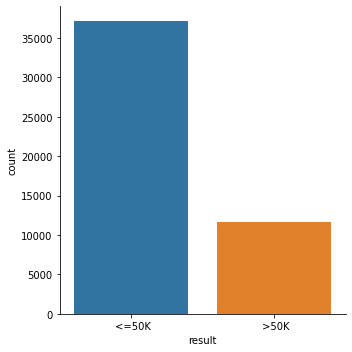

In [182]:
sns.catplot(x = "result", data = data, kind="count")

> transformación de valor catg > num

Transformamos ya nuestra variable TARGET de tipo categórico a un tipo numérico para facilitar la visualización de las relaciones con las variables feature en el apartado siguiente:

In [183]:
data["result_01"] = np.where(data["result"]==" <=50K",0,1)
data.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result,origin,result_01
20222,43,Local-gov,174395,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K,dataset1_train,0
47234,35,Private,105813,Some-college,10,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K,dataset2_test,0
11798,59,Self-emp-inc,223215,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1977,50,United-States,>50K,dataset1_train,1
25764,52,Private,123011,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,dataset1_train,1
6051,56,?,131608,HS-grad,9,Divorced,?,Not-in-family,White,Male,0,0,10,United-States,<=50K,dataset1_train,0


### 3.2.2. Features: columnas numéricas

In [184]:
features_num = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']

a) distribución de cada variable

In [185]:
#primera visualización:
#fig,ax = plt.subplots(2,3)
#fig.set_size_inches(12,10)
#plt.subplots_adjust(left=1, bottom=1, right=2, top=1.5, wspace=0.5, hspace=1)

#ax[0,0].hist(data["age"])
#ax[0,1].hist(data["fnlwgt"])
#ax[0,2].hist(data["education-num"])
#ax[1,0].hist(data["capital-gain"])
#ax[1,1].hist(data["capital-loss"])
#ax[1,2].hist(data["hours-per-week"])

#ax[0,0].set_xlabel("age", color = "red", fontsize = 12)
#ax[0,1].set_xlabel("fnlwgt")
#ax[0,2].set_xlabel("education-num")
#ax[1,0].set_xlabel("capital-gain")
#ax[1,1].set_xlabel("capital-loss")
#ax[1,2].set_xlabel("hours-per-week")
#plt.legend()
#ok pero seleccionamos otro

In [186]:
#segunda visualización (à la kaggle): (elabroado solo para la primera variable)
#num_plot(data, 'age', 'distribution age','$')
#ok, pero seleccionamos otro

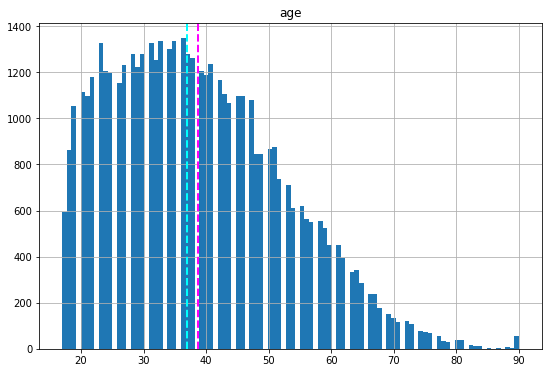

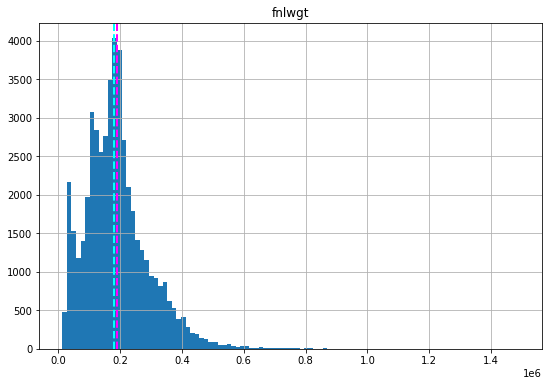

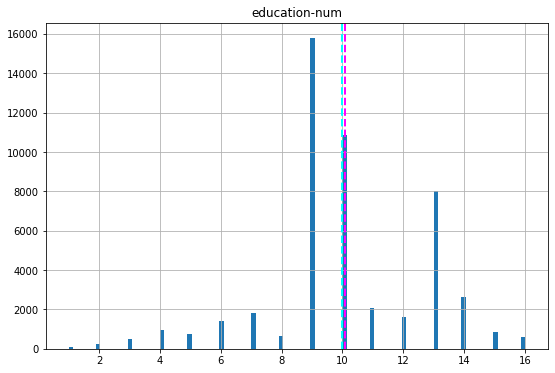

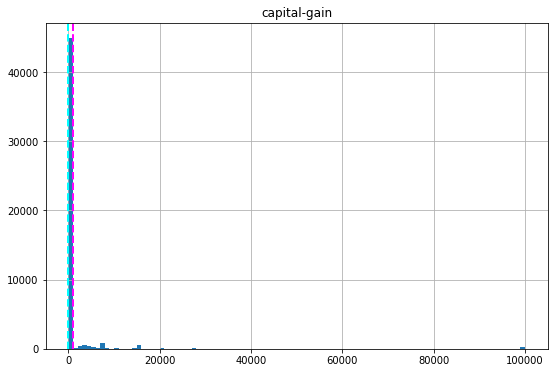

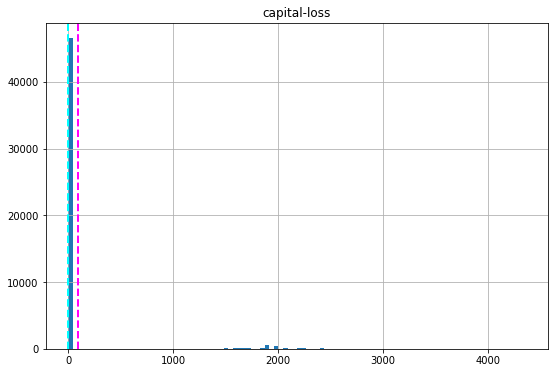

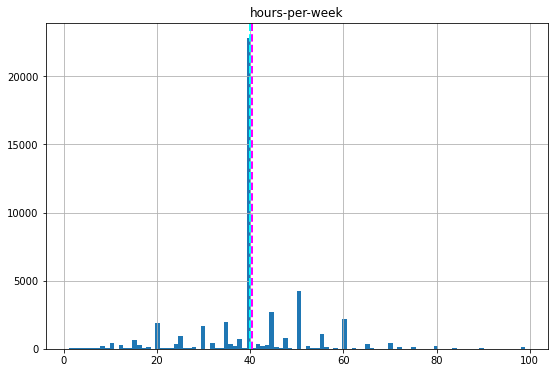

In [187]:
#tercera visualización:
for col in features_num:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

b) distribución de cada variable independiente numérica respecto a la variable target

> visualización mediante boxplots

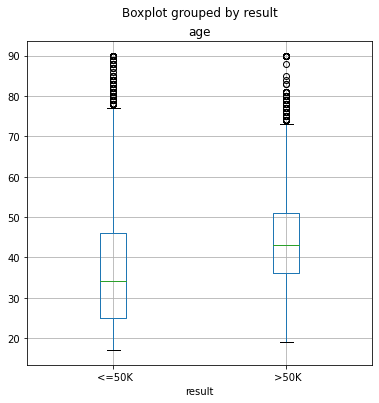

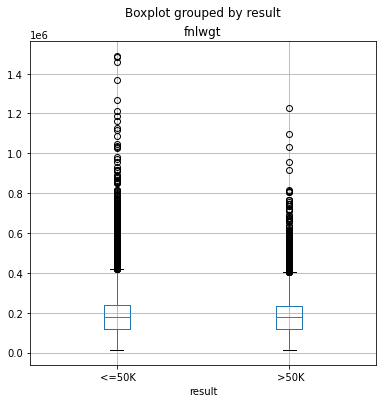

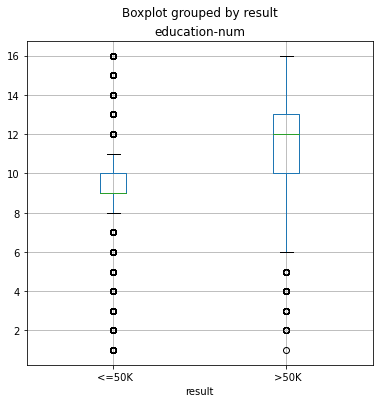

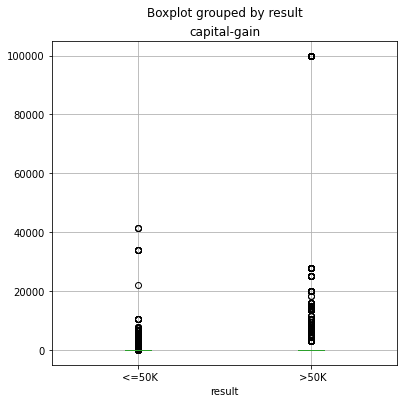

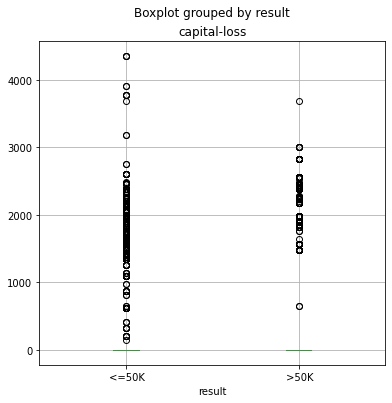

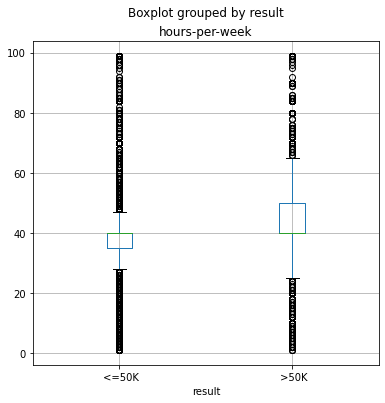

In [188]:
for col in features_num:
    data.boxplot(column=col, by='result', figsize=(6,6))
    plt.title(col)
plt.show()

> mediante histplot:

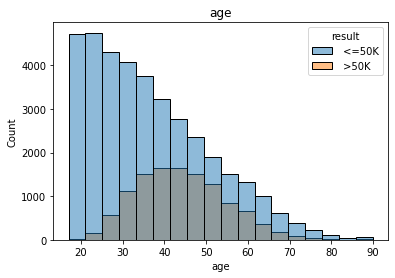

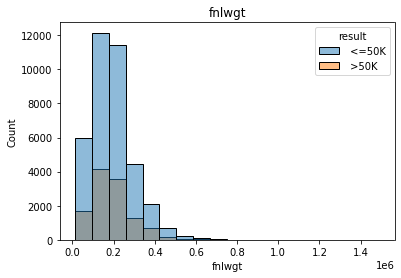

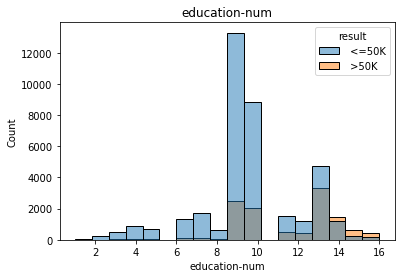

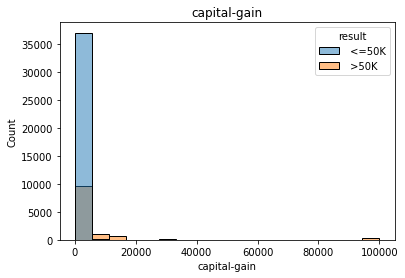

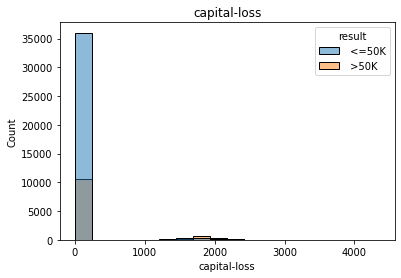

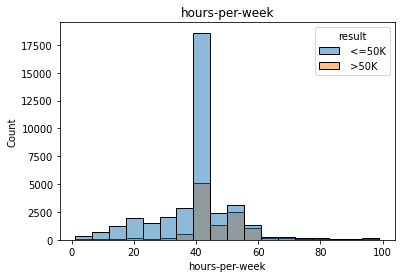

In [189]:
for col in features_num:
    sns.histplot(data=data, x = col, hue= "result", bins = 18)
    plt.title(col)
    plt.show()

*Features numéricos: primera conclusión:*  

Features por incluir en dataset "datadef":  
- age, education-num y hours-per-week (diferencia en la distribución + concentración de valores relacionada con un ingreso de más o menos de 50.000 dolares)  

Features por excluir:  
- fnlwgt (seguro)

Features menos claros:
- capital-gain, capital-loss (estos dos algo menos claro: distribución totalmente desbalanceada - a ojo, no podemos deducir si están relacionados los valores con la inclusión en algún grupo de la target).

In [190]:
data.groupby("result_01")["capital-gain"].value_counts(ascending=False)   #parámetro by default....

result_01  capital-gain
0          0               35611
           5013              117
           3325               81
           2174               74
           4650               63
                           ...  
1          7896                3
           6097                2
           18481               2
           6612                1
           7262                1
Name: capital-gain, Length: 127, dtype: int64

In [191]:
data.groupby("result_01")["capital-loss"].value_counts()

result_01  capital-loss
0          0               36017
           1590               62
           1602               62
           1876               59
           1740               58
                           ...  
1          2282                2
           1648                1
           1911                1
           2201                1
           3683                1
Name: capital-loss, Length: 107, dtype: int64

Miremos con más detalle las dos variables mediante un pairplot y una tabla de correlaciones. 

In [192]:
datadef_parte1_prob = data.loc[:,["age","education-num","hours-per-week","capital-gain", "capital-loss", "result_01"]]
datadef_parte1_prob

,age,education-num,hours-per-week,capital-gain,capital-loss,result_01
0,39,13,40,2174,0,0
1,50,13,13,0,0,0
2,38,9,40,0,0,0
3,53,7,40,0,0,0
4,28,13,40,0,0,0
...,...,...,...,...,...,...
48837,39,13,36,0,0,0
48838,64,9,40,0,0,0
48839,38,13,50,0,0,0
48840,44,13,40,5455,0,0


In [193]:
sns.pairplot(datadef_parte1_prob, hue = "result_01")

Del pairplot, resulta que sí puede valer la pena incluir capital-gain en nuestras variables de predicción (los valores altos - aunque escasos sobre el conjunto - se sitúan todos en el grupo 1 de la target. Estas son, por lo tanto, las variables numéricas que incluirimos en el análisis:

In [194]:
datadef_parte1 = data.loc[:,["age","education-num","hours-per-week","capital-gain", "result_01"]]
datadef_parte1

,age,education-num,hours-per-week,capital-gain,result_01
0,39,13,40,2174,0
1,50,13,13,0,0
2,38,9,40,0,0
3,53,7,40,0,0
4,28,13,40,0,0
...,...,...,...,...,...
48837,39,13,36,0,0
48838,64,9,40,0,0
48839,38,13,50,0,0
48840,44,13,40,5455,0


<AxesSubplot:>

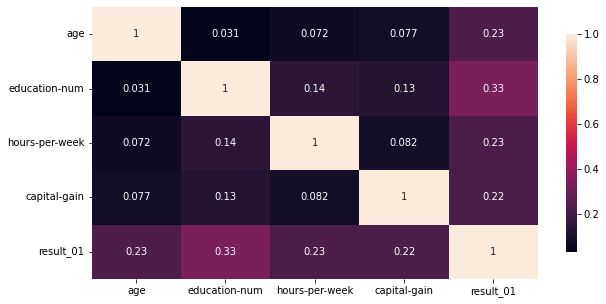

In [195]:
plt.figure(figsize=(10,5))
sns.heatmap(datadef_parte1.corr(), annot=True, cbar_kws={"shrink":0.80})

Noticias positivas de cara al análisis posterior: poca colineralidad entre las variables independientes.  
Noticias algo menos satisfactorias: correlaciones relativamente bajas entre las variables independientes por un lado, y la variable target, por otro. A primera vista, no hemos podido encontrar pistas sobre si algunos modelos serían más o menos adecuados para usar en estas situaciones.

### 3.2.3. Features: columnas categóricas

In [196]:
features_catg = ["workclass","education","marital-status","occupation","relationship","race","sex","native-country"]

a) Distribución de los valores de cada variable categórica:

C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


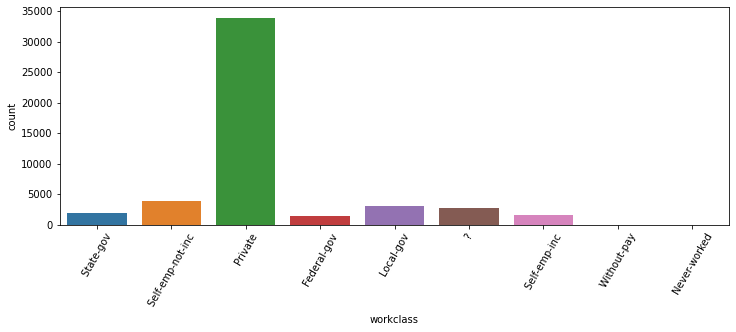

C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


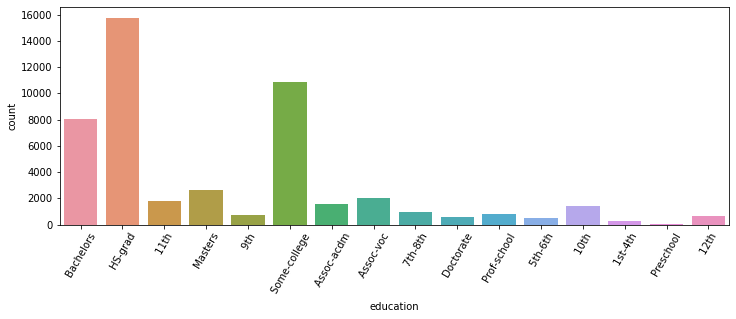

C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


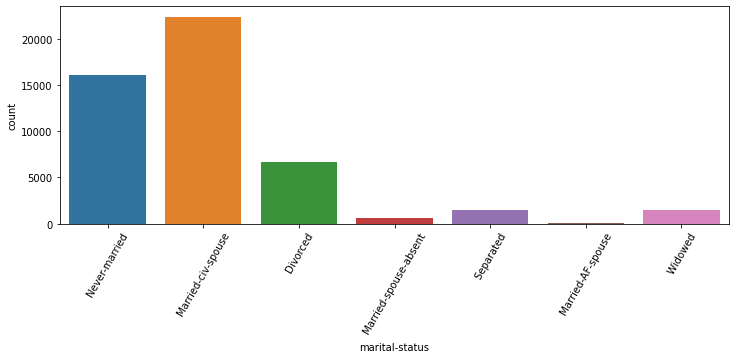

C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


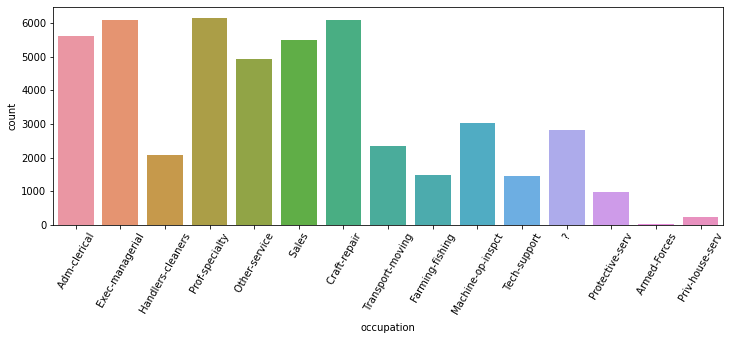

C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


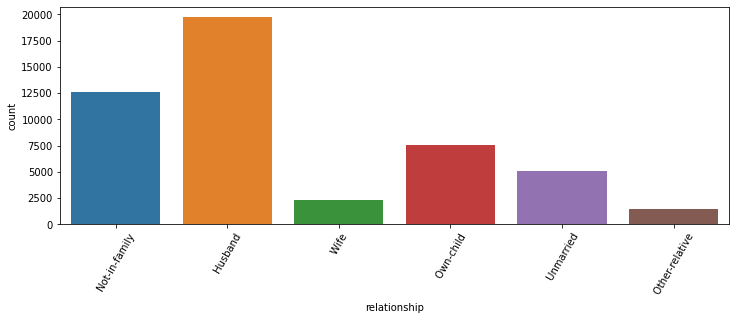

C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


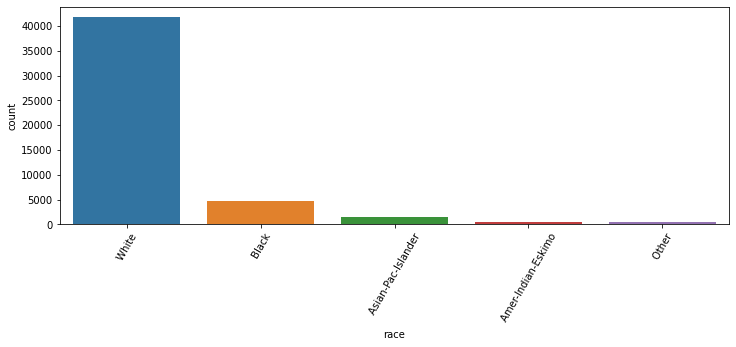

C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


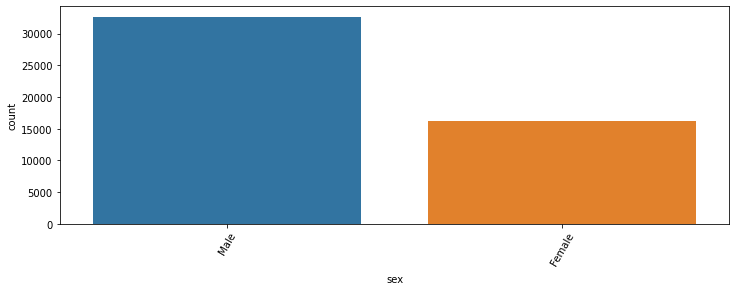

C:\Users\piovr\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


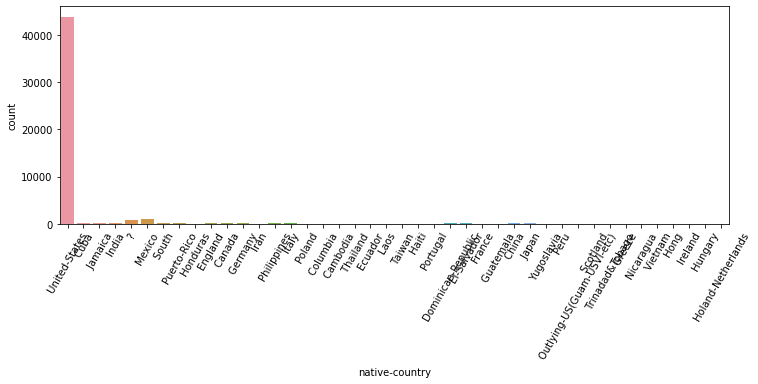

In [197]:
#primera visualización:
for col in features_catg:
    plt.figure(figsize=(12,4))
    chart = sns.countplot(data[col], orient = 60)
    chart.set_xticklabels(chart.get_xticklabels(), rotation= 60)
    plt.show(); 

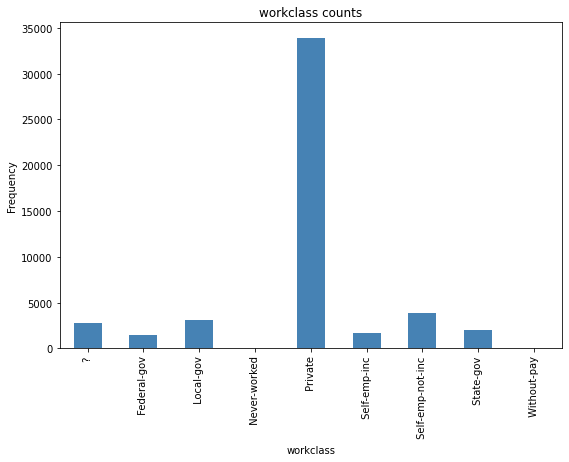

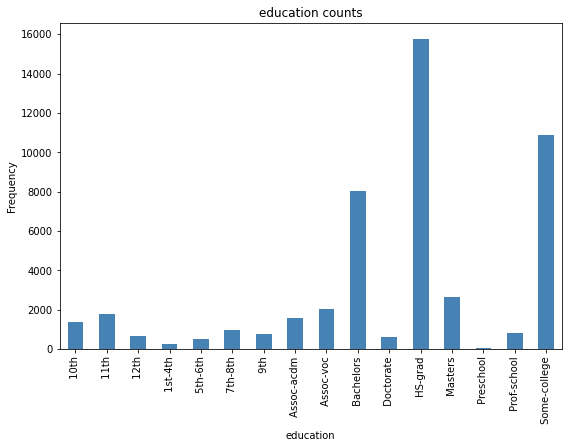

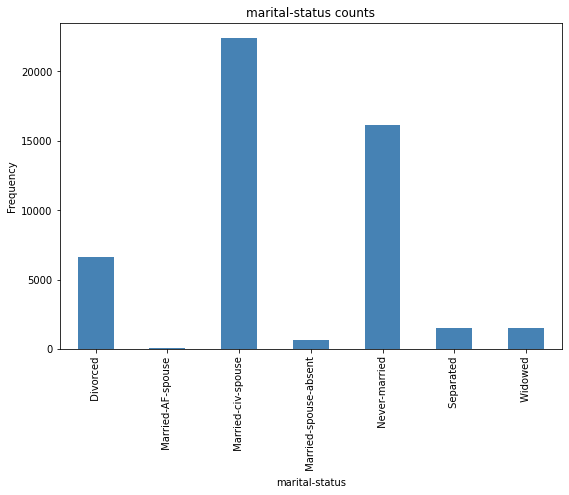

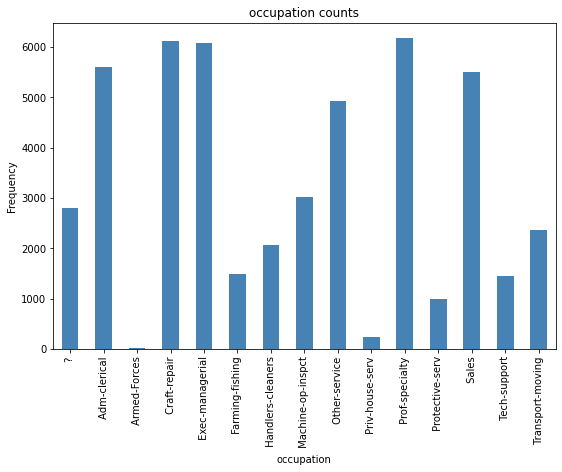

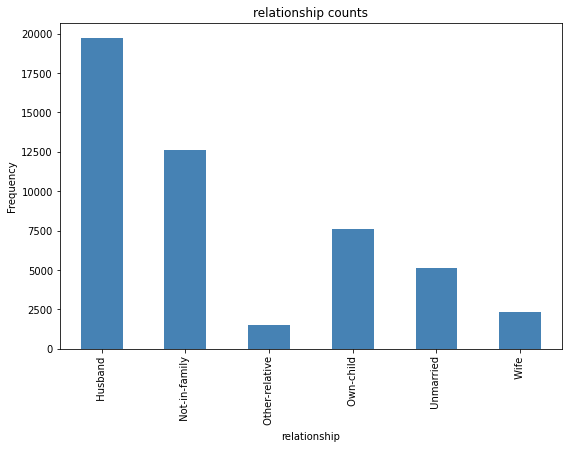

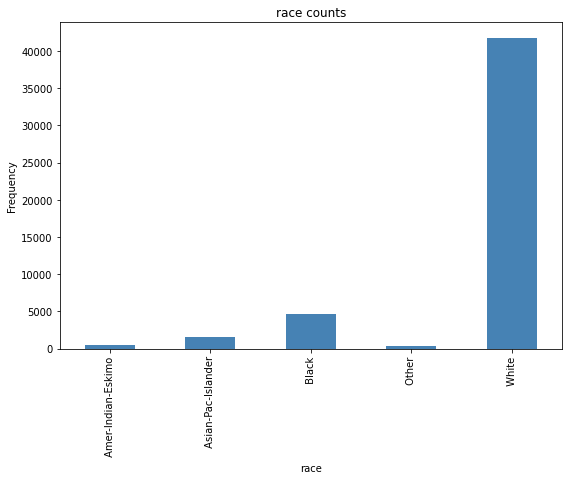

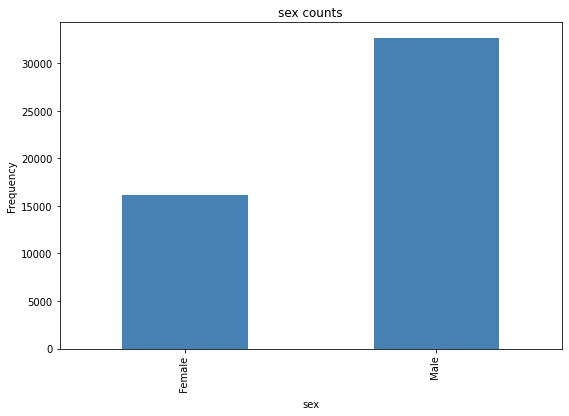

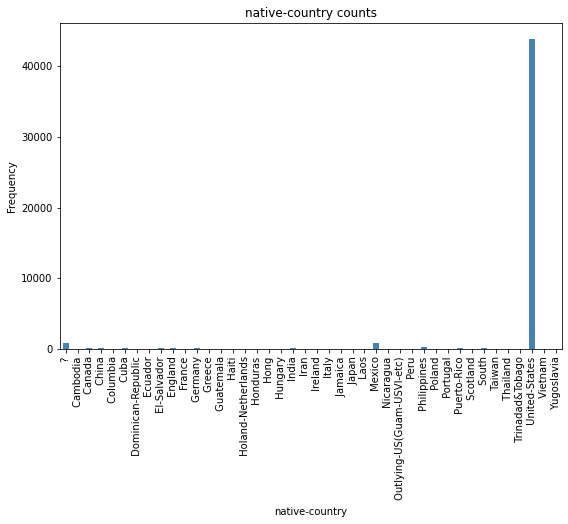

In [198]:
#segunda visualización:
for col in features_catg:
    counts = data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

De notar: números muy distintos de los valores distintos y presencia del valor "?" en tres variables (workclass, occupation, native-country). 

b) Relación entre cada feature categórica y la target:

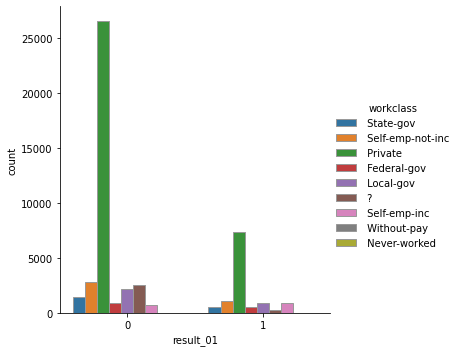

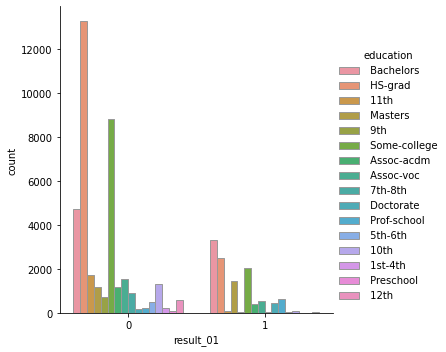

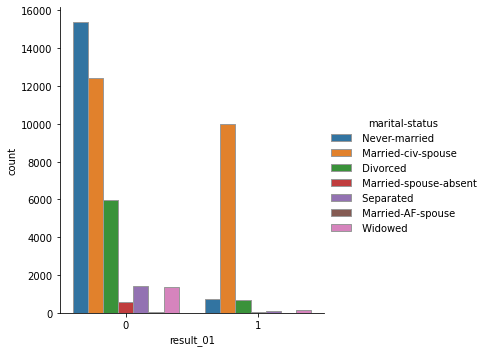

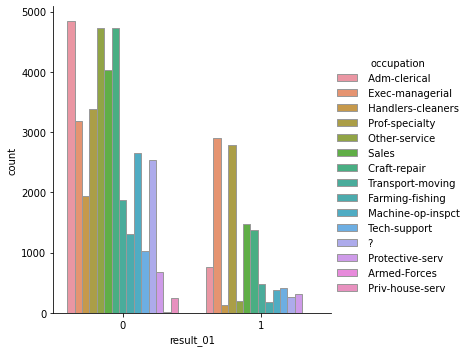

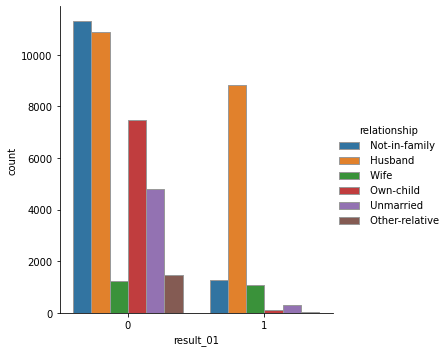

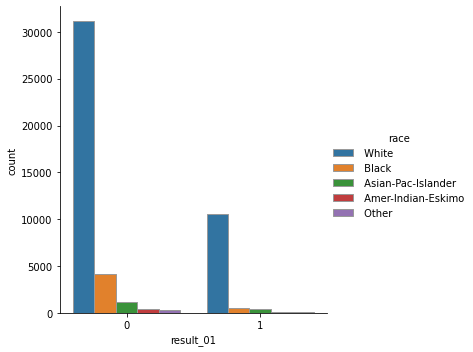

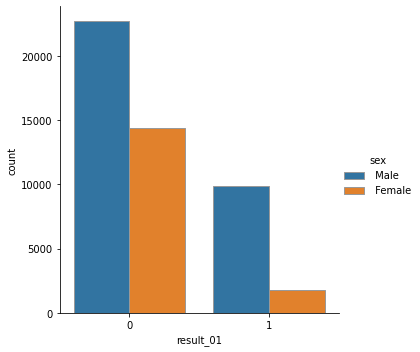

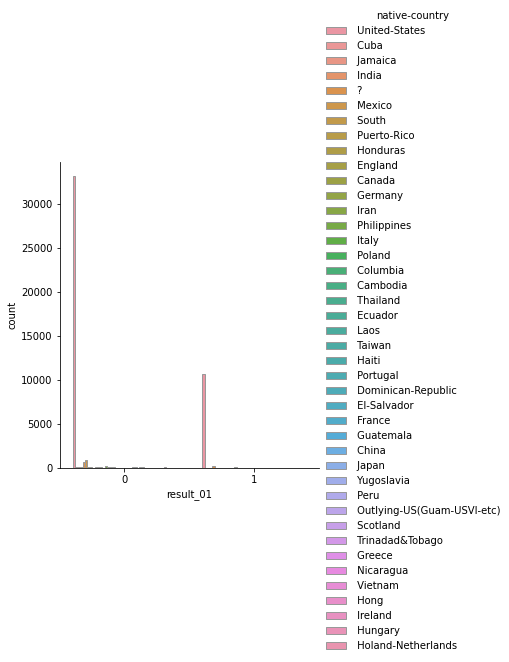

In [199]:
#primera visualización:
for col in features_catg: 
  sns.catplot(x="result_01",
              hue=col,
              kind="count",
              edgecolor=".6",
              orient = "H",
              ###check  multiple = "stack", 
              data=data);

<Figure size 2160x720 with 0 Axes>

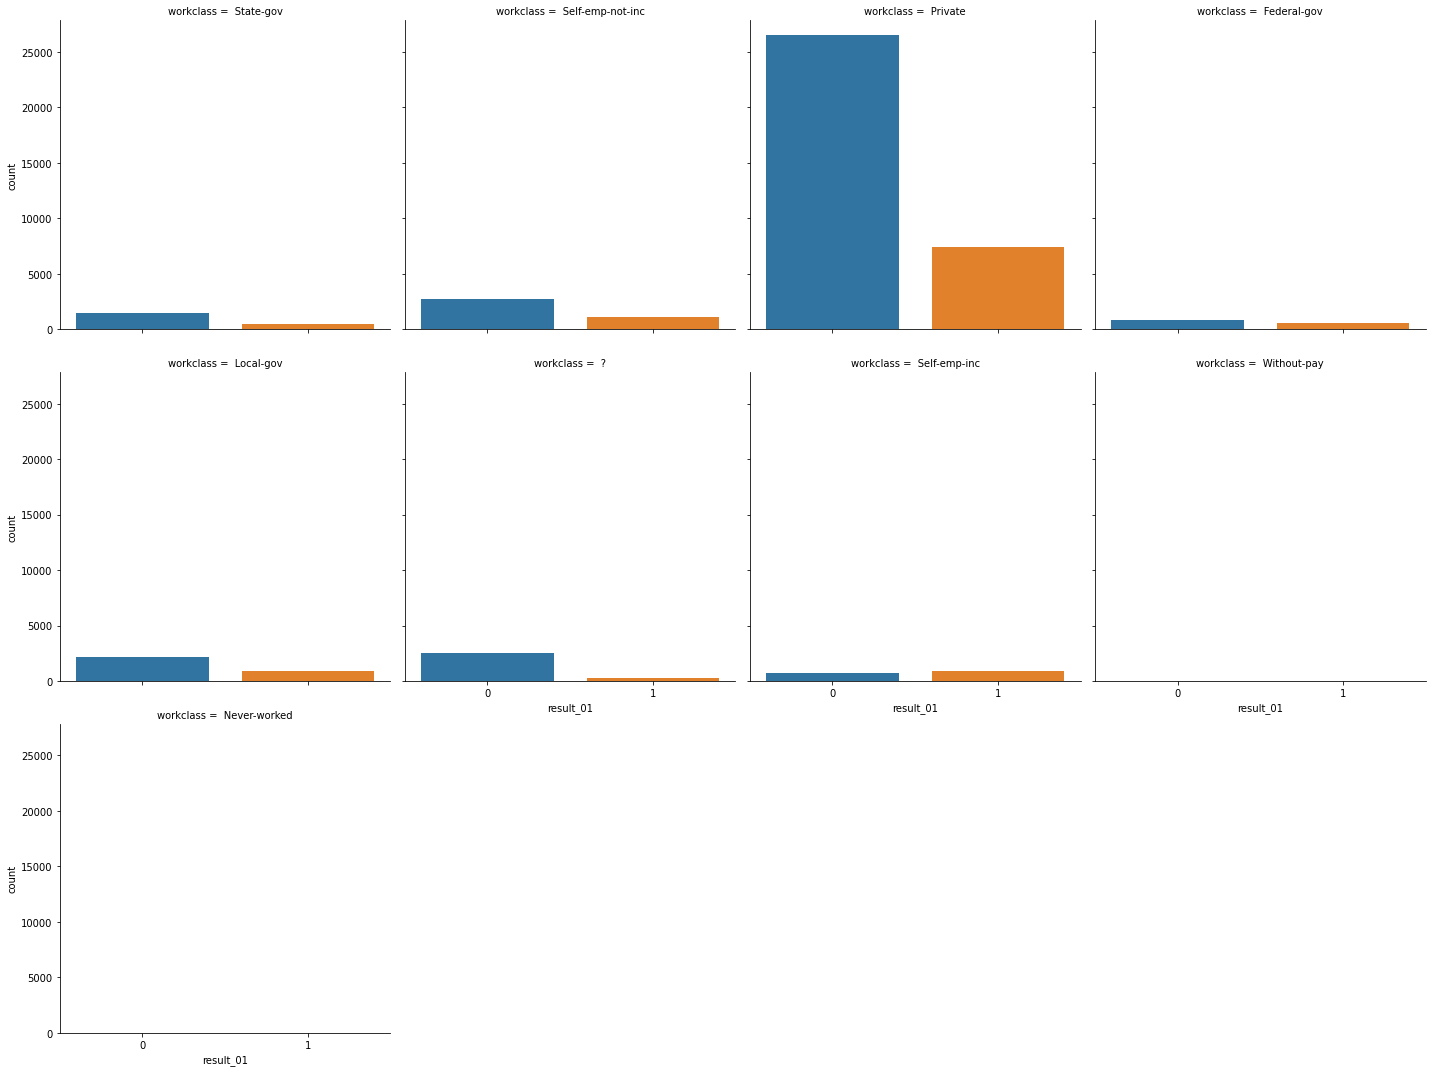

<Figure size 2160x720 with 0 Axes>

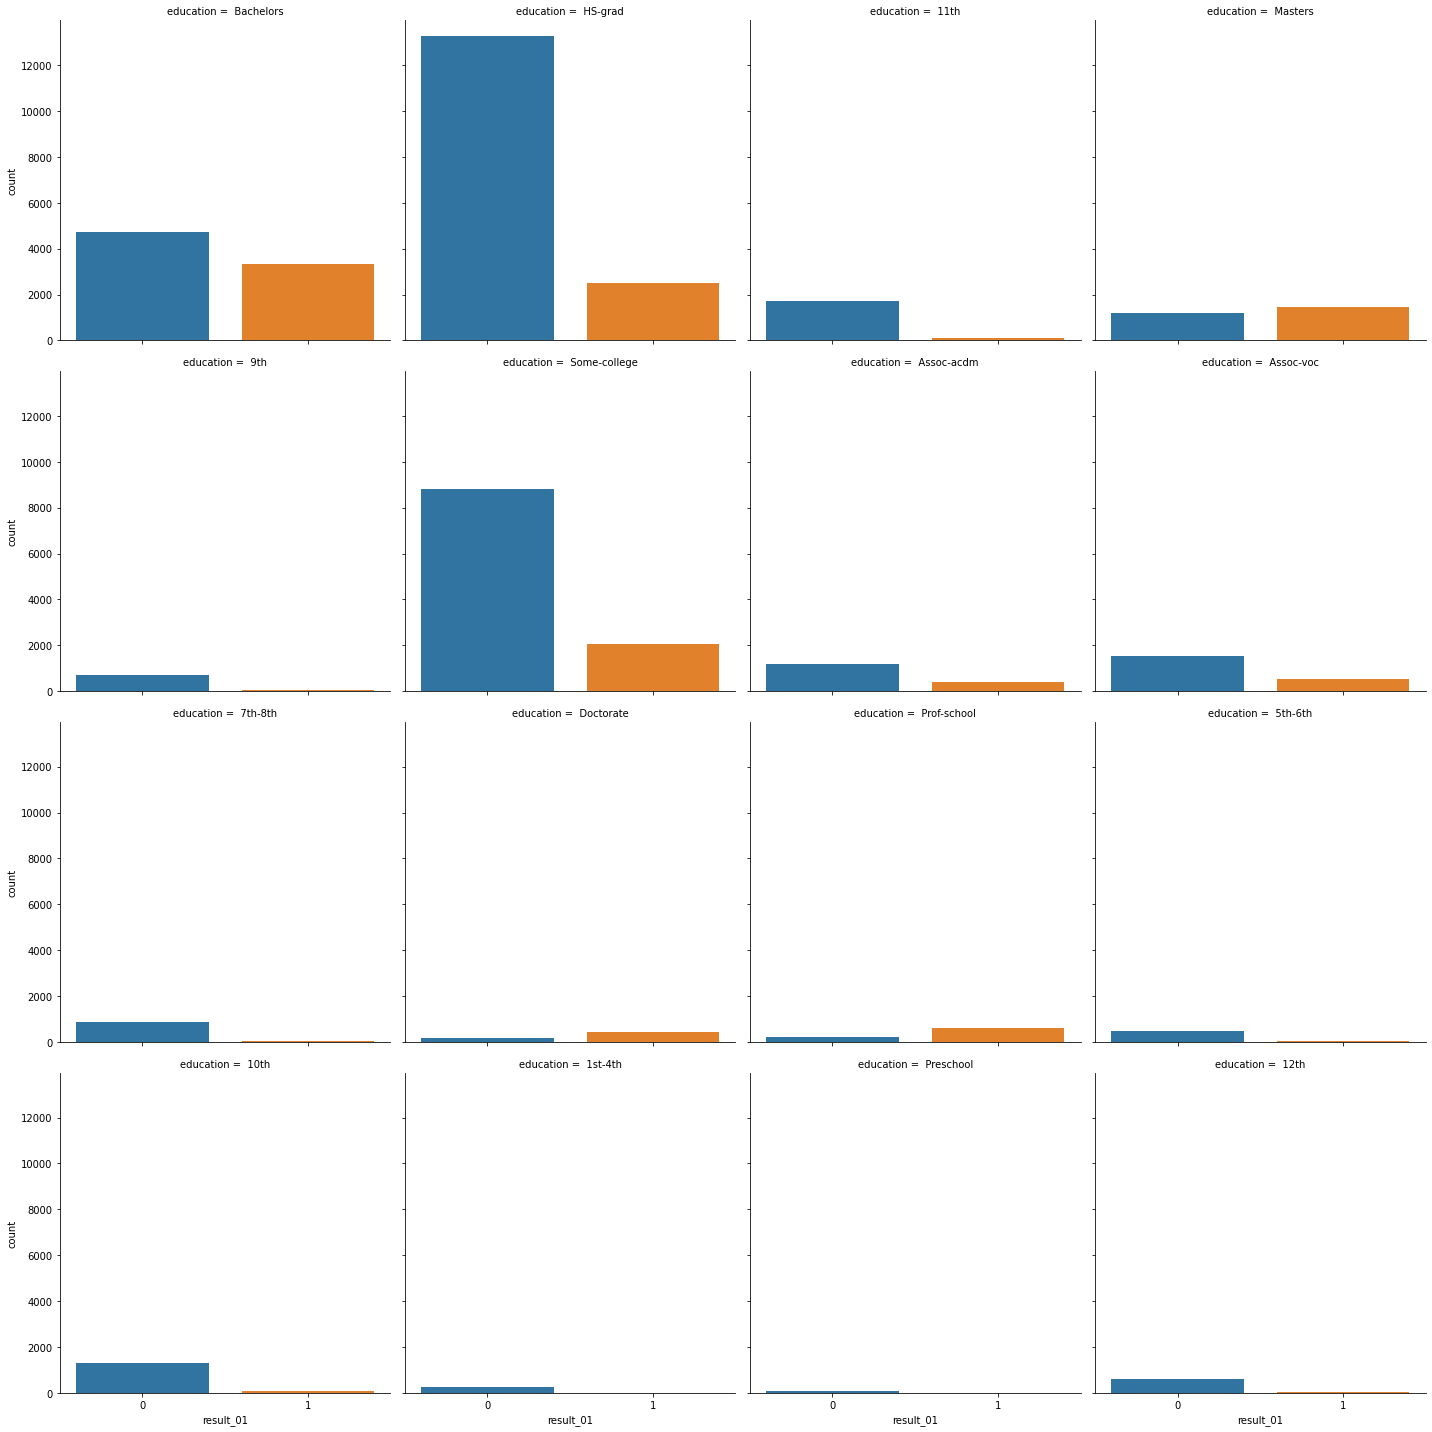

<Figure size 2160x720 with 0 Axes>

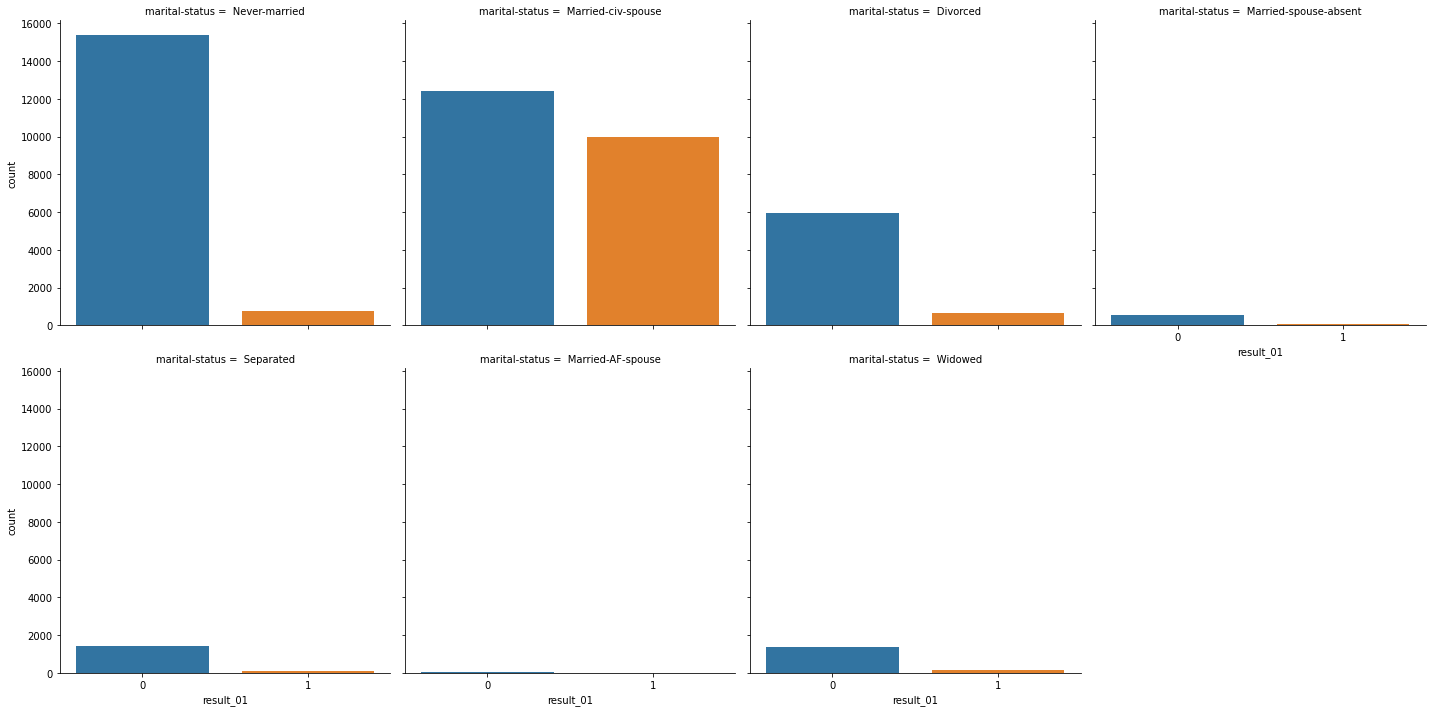

<Figure size 2160x720 with 0 Axes>

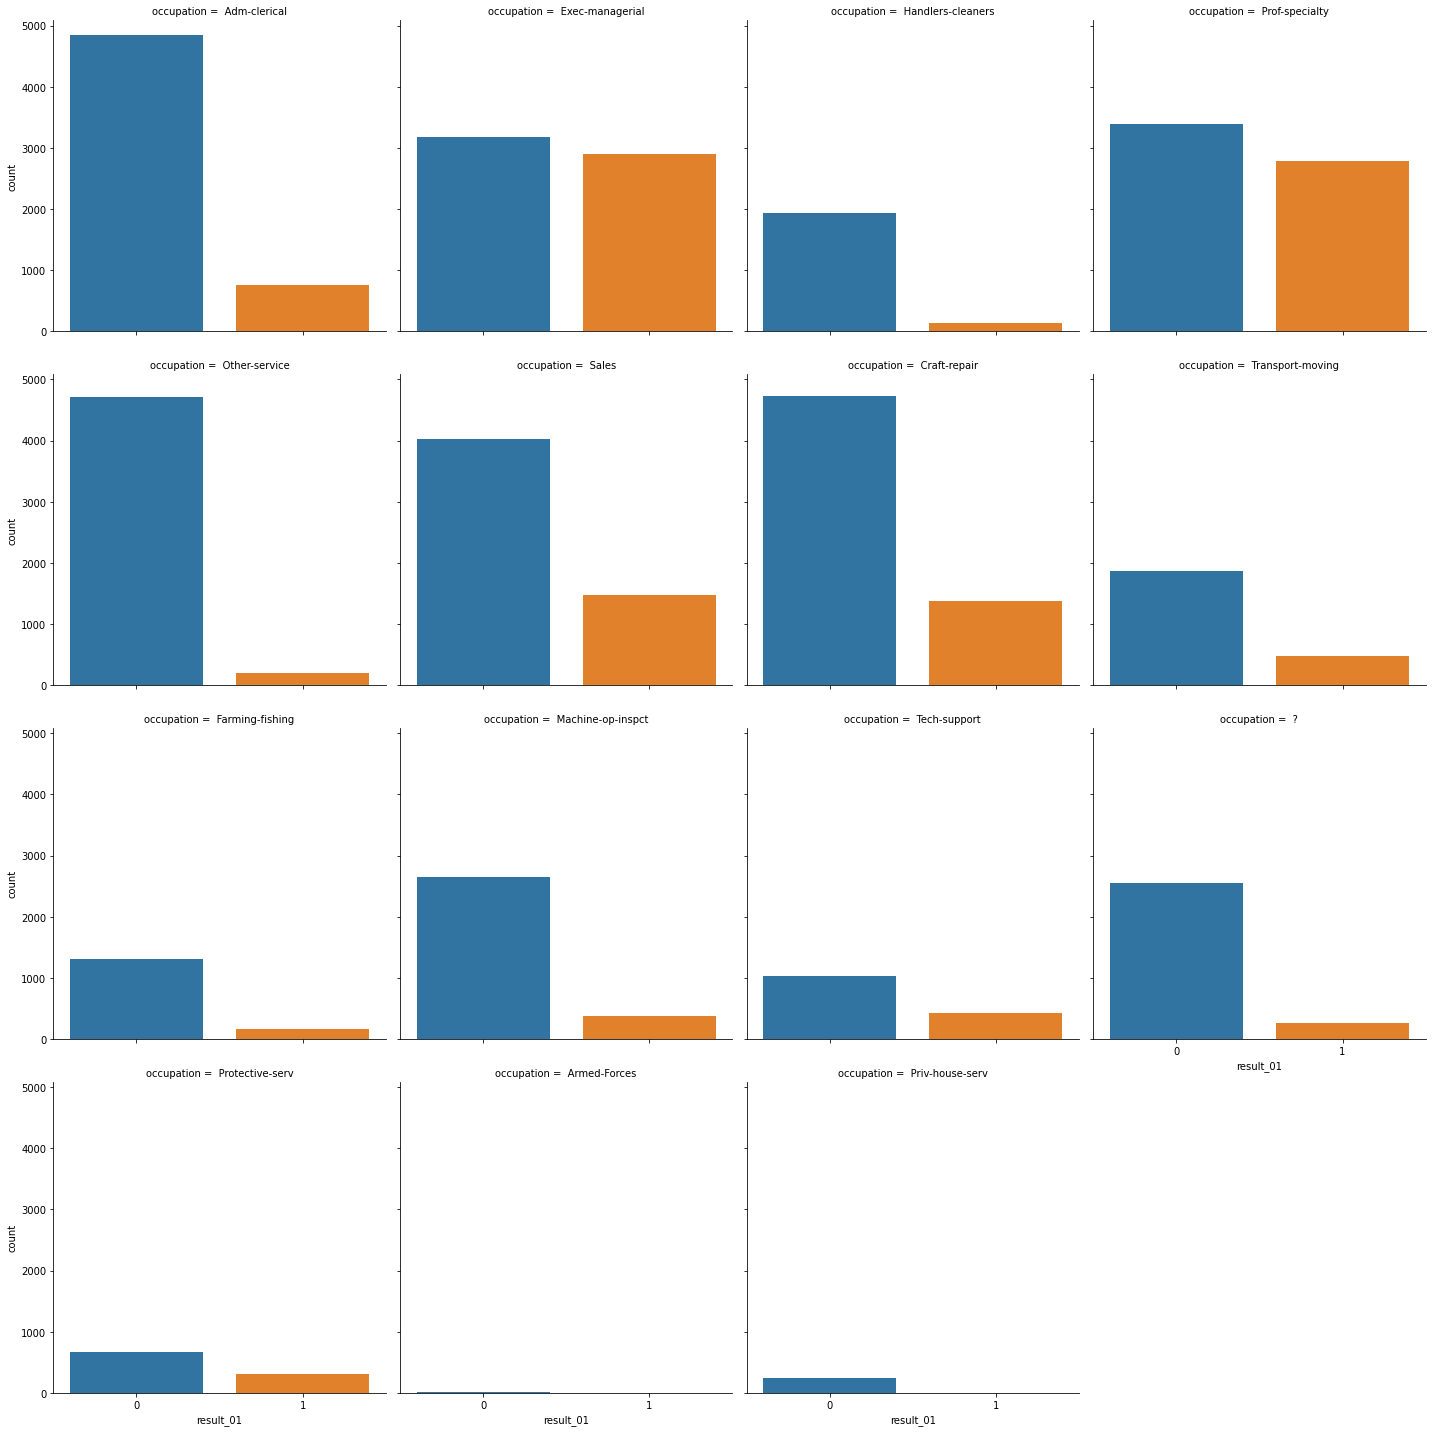

<Figure size 2160x720 with 0 Axes>

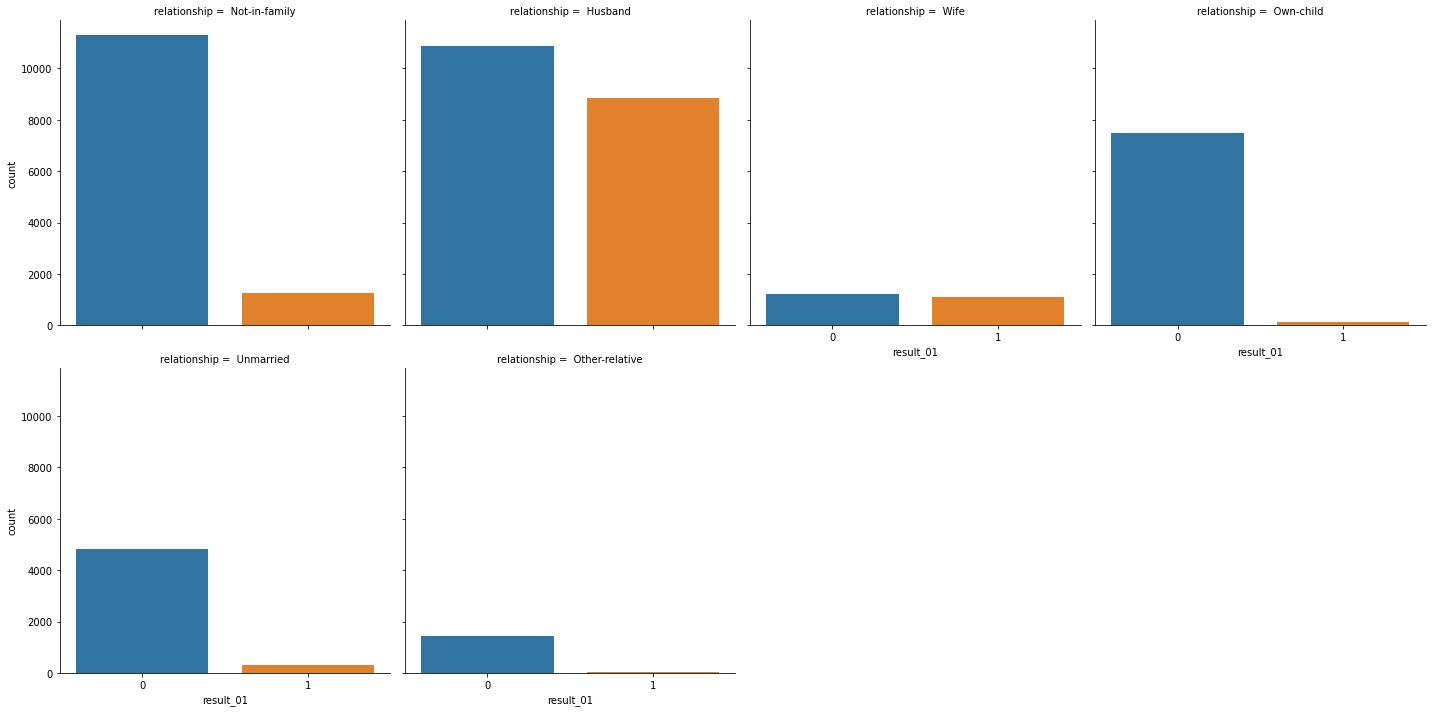

<Figure size 2160x720 with 0 Axes>

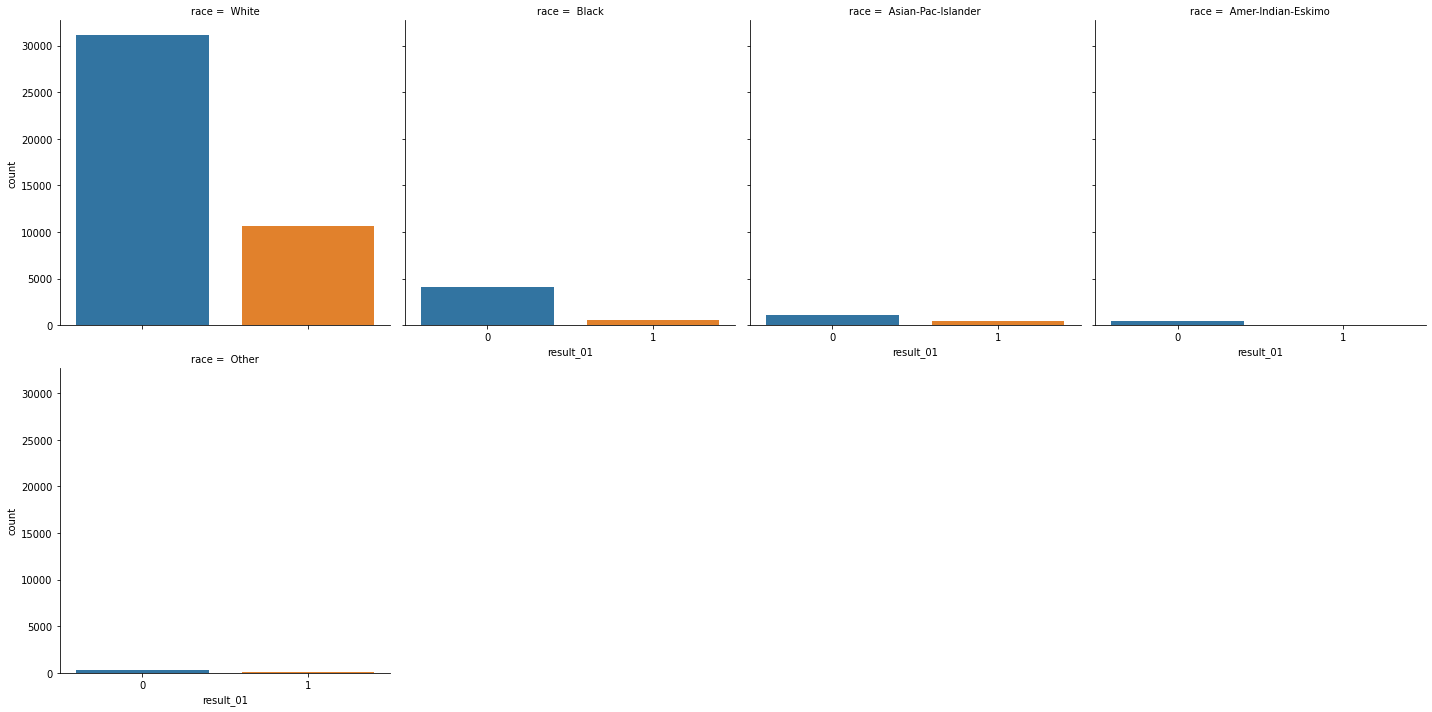

<Figure size 2160x720 with 0 Axes>

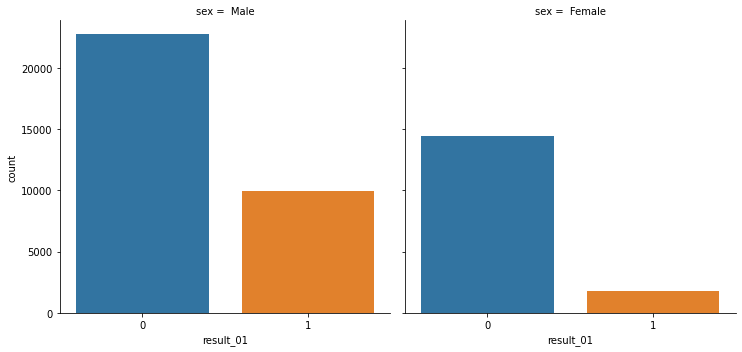

In [200]:
#segunda visualización:
for col in features_catg[:-1]:  #excluimos país porque nos da un montón de gráficas (casi) 'vacías'
    plt.figure(figsize=(30,10));
    sns.catplot(x="result_01",              
            col=col,    
            col_wrap=4,
            data=data,
            kind="count");

Observamos lo siguiente:

Todas las variables se presentan con números bastante distintos en sus valores, y en su distribición sobre los valores 0-1 de la target.

Consideramos 'race' y 'native-country' (el último en mayor grado) como menos informativos, dado que la distribución de sus valores corresponde en grandes líneas con el 75/25% de la target => candidatos para no incluir. 

Por otro lado, constatamos más variación en la distribución de los valores de 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'sex' respecto a su clasificación en 0 o 1 de la target. Por lo menos algunos valores se encuentran orientados claramente hacia el 0 o el 1, y eso no en otra proporción que la distribución del número de 0 y 1 (75% vs 25%) de la target. Posiblemente 'workclass' y 'occupation' por un lado, y 'marital-status' and 'relationship' por otro, pueden estar relacionados entre ellos.

Para las variables categóricas retenidas, una de las tareas del apartado siguiente consistirá en convertirlas en variables numéricas (apartado 4). De esta manera también podremos averiguar mejor eventuales colinearidades dentre ellas.

Asimismo, la columna 'education' (variable catg) y 'education-num' (variable num) podrían resultar idénticas...

**constitución del dataset "datadef" con el cual seguiremos trabajando a partir de ahora:**

In [201]:
datadef_parte2 = data.loc[:,['workclass', 'education','marital-status', 'occupation','relationship','sex']]
datadef_parte2.sample(5)

datadef = pd.merge(datadef_parte1, datadef_parte2, left_index=True, right_index = True)
datadef.sample(5)

,age,education-num,hours-per-week,capital-gain,result_01,workclass,education,marital-status,occupation,relationship,sex
6217,55,9,45,0,1,Self-emp-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,Male
21936,18,6,27,0,0,Private,10th,Never-married,Farming-fishing,Own-child,Male
29257,56,8,40,0,0,Self-emp-inc,12th,Widowed,Exec-managerial,Not-in-family,Female
20452,34,10,40,4386,1,State-gov,Some-college,Married-civ-spouse,Prof-specialty,Husband,Male
25058,27,13,40,0,0,Private,Bachelors,Never-married,Prof-specialty,Own-child,Female


In [202]:
data_summary = DataFrameSummary(datadef)
data_summary.columns_stats.T

,counts,uniques,missing,missing_perc,types
age,48842,74,0,0%,numeric
education-num,48842,16,0,0%,numeric
hours-per-week,48842,96,0,0%,numeric
capital-gain,48842,123,0,0%,numeric
result_01,48842,2,0,0%,bool
workclass,48842,9,0,0%,categorical
education,48842,16,0,0%,categorical
marital-status,48842,7,0,0%,categorical
occupation,48842,15,0,0%,categorical
relationship,48842,6,0,0%,categorical


## **4. Preprocesado del dataset**

## 4.1. FASE 1 : transformar el dataset para su modelling  

La única modificación sobre los datos (fuera de algunas columnas eliminadas) ha sido la conversión de los valores de la target (limpieza + conversión a valores numéricos). En este apartado trataremos sobre todo los missing values, la conversión de valores categóricas en numéricas.

### 4.2.1. Tratar valores ausentes

Recordemos que en nuestro dataset a primera vista no se presentan 'missing values'en el sentido literal de la palabra (véase data_summary justo arriba). Si hubiera tenido, los habríamos podido encontrar de las siguientes maneras:

In [203]:
#presentación de valores "null" en dataframe:
datadef[datadef.isnull().any(axis=1)]

,age,education-num,hours-per-week,capital-gain,result_01,workclass,education,marital-status,occupation,relationship,sex


<AxesSubplot:>

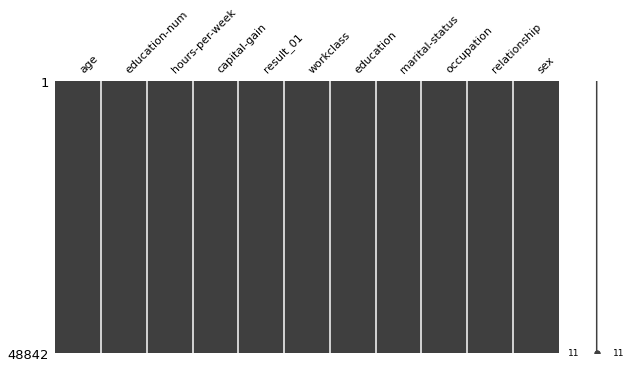

In [204]:
#visualización de valores "0" en una gráfica:
msno.matrix(datadef, figsize=(10,5), fontsize=11)

Sin embargo, nuestro dataset contiene bastantes valores "?", lo que de hecho equivale a "missing values". Las columnas y su número de filas concernidas son:

In [205]:
for col in datadef.columns:
    mask = datadef[col] == " ?"
    total = mask.sum()
    print(col, total)

age 0
education-num 0
hours-per-week 0
capital-gain 0
result_01 0
workclass 2799
education 0
marital-status 0
occupation 2809
relationship 0
sex 0


¿Cuál es el impacto si eliminamos todas las filas concernidas?

In [206]:
datadef_rowslimp = datadef.drop(datadef[(datadef["workclass"] == " ?") | (datadef["occupation"] == " ?")].index)   #en paso previo habíamos incluido tb | (datadef["native-country"] == " ?"

In [207]:
#reset index (necesario par evitar NaNs con procesos ulteriores de Encoding)
datadef_rowslimp = datadef_rowslimp.reset_index(drop = True)

In [208]:
datadef_rowslimp.head()

,age,education-num,hours-per-week,capital-gain,result_01,workclass,education,marital-status,occupation,relationship,sex
0,39,13,40,2174,0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,Male
1,50,13,13,0,0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male
2,38,9,40,0,0,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male
3,53,7,40,0,0,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male
4,28,13,40,0,0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female


In [209]:
datadef_rowslimp.shape

(46033, 11)

In [210]:
#impacto sobre el número de filas del dataset entero: 6%  (7% si la columna native-country incluida)
1 - (round(datadef_rowslimp.count()[1]/datadef.count()[1],2))

0.06000000000000005

In [211]:
datadef_rowslimp.sample(15)

,age,education-num,hours-per-week,capital-gain,result_01,workclass,education,marital-status,occupation,relationship,sex
35418,18,8,50,0,0,Self-emp-not-inc,12th,Never-married,Farming-fishing,Own-child,Male
6480,48,13,45,0,1,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male
33426,23,9,35,0,0,Private,HS-grad,Never-married,Other-service,Own-child,Female
31221,30,14,30,0,0,Private,Masters,Married-civ-spouse,Prof-specialty,Wife,Female
10554,33,13,40,0,0,Private,Bachelors,Never-married,Handlers-cleaners,Not-in-family,Male
39604,54,13,40,0,1,Self-emp-inc,Bachelors,Married-civ-spouse,Sales,Husband,Male
29530,26,9,40,0,0,Private,HS-grad,Divorced,Farming-fishing,Not-in-family,Male
17780,19,6,40,0,0,Private,10th,Never-married,Craft-repair,Not-in-family,Male
13309,57,10,40,0,0,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,Male
41233,18,7,28,0,0,Private,11th,Never-married,Other-service,Own-child,Male


In [212]:
#control
for col in datadef_rowslimp.columns:
    mask = datadef_rowslimp[col] == " ?"
    total = mask.sum()
    print(col, total)

age 0
education-num 0
hours-per-week 0
capital-gain 0
result_01 0
workclass 0
education 0
marital-status 0
occupation 0
relationship 0
sex 0


### 4.2.2. Buscar filas duplicadas

In [213]:
mask = datadef_rowslimp.duplicated()
mask

0        False
1        False
2        False
3        False
4        False
         ...  
46028     True
46029    False
46030     True
46031    False
46032    False
Length: 46033, dtype: bool

In [214]:
datadef_rowslimp[mask]

,age,education-num,hours-per-week,capital-gain,result_01,workclass,education,marital-status,occupation,relationship,sex
332,33,13,40,0,1,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male
370,27,13,50,0,0,Private,Bachelors,Never-married,Craft-repair,Not-in-family,Male
527,24,9,40,0,0,Private,HS-grad,Never-married,Handlers-cleaners,Unmarried,Female
534,24,9,40,0,0,Private,HS-grad,Never-married,Craft-repair,Own-child,Male
566,29,9,40,0,0,Private,HS-grad,Never-married,Craft-repair,Not-in-family,Male
...,...,...,...,...,...,...,...,...,...,...,...
46022,32,9,40,0,0,Private,HS-grad,Married-civ-spouse,Handlers-cleaners,Husband,Male
46025,31,9,40,0,0,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,Male
46026,25,9,40,0,0,Private,HS-grad,Never-married,Other-service,Own-child,Female
46028,33,13,40,0,0,Private,Bachelors,Never-married,Prof-specialty,Own-child,Male


In [215]:
datadef_rowslimp[mask].count()   #shape() no funciona: tuple object is not callable

age               8519
education-num     8519
hours-per-week    8519
capital-gain      8519
result_01         8519
workclass         8519
education         8519
marital-status    8519
occupation        8519
relationship      8519
sex               8519
dtype: int64

In [216]:
datadef_rowslimp[datadef_rowslimp.duplicated()].sort_values(by = "workclass")

,age,education-num,hours-per-week,capital-gain,result_01,workclass,education,marital-status,occupation,relationship,sex
27190,20,9,20,0,0,Federal-gov,HS-grad,Never-married,Adm-clerical,Other-relative,Male
23910,54,9,40,0,1,Federal-gov,HS-grad,Married-civ-spouse,Adm-clerical,Husband,Male
40489,44,13,40,0,1,Federal-gov,Bachelors,Married-civ-spouse,Adm-clerical,Husband,Male
16530,46,9,40,0,1,Federal-gov,HS-grad,Married-civ-spouse,Adm-clerical,Husband,Male
44230,50,10,40,0,1,Federal-gov,Some-college,Married-civ-spouse,Adm-clerical,Husband,Male
...,...,...,...,...,...,...,...,...,...,...,...
37966,52,9,40,0,1,State-gov,HS-grad,Married-civ-spouse,Protective-serv,Husband,Male
38511,47,9,40,0,0,State-gov,HS-grad,Married-civ-spouse,Protective-serv,Husband,Male
34262,64,16,50,0,1,State-gov,Doctorate,Married-civ-spouse,Prof-specialty,Husband,Male
30744,46,10,38,7688,1,State-gov,Some-college,Married-civ-spouse,Exec-managerial,Husband,Male


Ante las filas 'duplicadas', al final optamos por no eliminar filas por la razón siguiente: al considerar las filas duplicadas (siempre se nos presenta una de ellas) es posible que haya dos registros idénticos que representen a dos personas distintas. Cogemos así el riesgo de incluir 2 veces la misma persona, pero de no hacer así, opinamos que el riesgo de echar personas de manera errónea es mayor.

Observación: filas 13084 y 22300 parecen ser idénticas, pero aparecen ambas en el vistazo de los duplicados, donde por defecto se guardaría solo la primera fila de dos idénticas. (porque si 3: se suprime solo el segundo?)

### 4.2.3. Eliminar columnas

Si los valores de la columna "education" corresponden siempre a único valor único de "education-num", podremos eliminarla. 

In [217]:
#primer vistazo: sacamos las columans "education" y "education-num"
datadef_rowslimp.loc[:,["education","education-num"]]

,education,education-num
0,Bachelors,13
1,Bachelors,13
2,HS-grad,9
3,11th,7
4,Bachelors,13
...,...,...
46028,Bachelors,13
46029,Bachelors,13
46030,Bachelors,13
46031,Bachelors,13


In [218]:
#control de si realmente son informativas de exactamente la misma manera:
colsdup = datadef_rowslimp.groupby(["education","education-num"])
colsdup.first()

,,age,hours-per-week,capital-gain,result_01,workclass,marital-status,occupation,relationship,sex
education,education-num,,,,,,,,,
10th,6,25,40,0,0,Private,Never-married,Craft-repair,Not-in-family,Male
11th,7,53,40,0,0,Private,Married-civ-spouse,Handlers-cleaners,Husband,Male
12th,8,35,50,0,1,Private,Divorced,Craft-repair,Not-in-family,Male
1st-4th,2,52,40,0,0,Private,Married-civ-spouse,Machine-op-inspct,Husband,Male
5th-6th,3,46,40,0,0,Private,Married-civ-spouse,Machine-op-inspct,Husband,Male
7th-8th,4,34,45,0,0,Private,Married-civ-spouse,Transport-moving,Husband,Male
9th,5,49,16,0,0,Private,Married-spouse-absent,Other-service,Not-in-family,Female
Assoc-acdm,12,32,50,0,0,Private,Never-married,Sales,Not-in-family,Male
Assoc-voc,11,40,40,0,1,Private,Married-civ-spouse,Craft-repair,Husband,Male


In [219]:
#confirmado que podemos (debemos!) eliminar una de las dos columnas
datadef_rowscolslimp = datadef_rowslimp.drop("education", axis=1)

### 4.2.4. Transformar variables con valor catg > valor num

Veamos cuántos valores conlleva cada variable categórica:  
- si son dos: transformación sencilla
- si son más: considerar si guardar los valores como números distintos en una columna (ok en caso de ordinalidad) vs. necesidad de trasponer valores 1 a varias columnas. Considerar también si el 'overload' que así provocamos de columnas realmente vale la pena.

solo columnas con 7 o menos valores distintos:

In [220]:
data_summary = DataFrameSummary(datadef_rowscolslimp)
data_summary.columns_stats.T

,counts,uniques,missing,missing_perc,types
age,46033,74,0,0%,numeric
education-num,46033,16,0,0%,numeric
hours-per-week,46033,96,0,0%,numeric
capital-gain,46033,121,0,0%,numeric
result_01,46033,2,0,0%,bool
workclass,46033,7,0,0%,categorical
marital-status,46033,7,0,0%,categorical
occupation,46033,14,0,0%,categorical
relationship,46033,6,0,0%,categorical
sex,46033,2,0,0%,bool


No parece haber columnas con valores categoriales 'ordinales'. La conversión a números no debería, por lo tanto, implicar ningún orden o jerarquía.  
Miremos cada categoría por separado.

In [221]:
#dividimos en dos para poder visualizarlo todo
valores_features_catg1 = ['workclass', 'marital-status', 'occupation']
valores_features_catg2 = ['relationship', "sex"]

for col in valores_features_catg1:
    print(col)
    print(datadef_rowscolslimp[col].value_counts())
    print("----------------------")


workclass
 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
Name: workclass, dtype: int64
----------------------
marital-status
 Married-civ-spouse       21451
 Never-married            14875
 Divorced                  6363
 Separated                 1433
 Widowed                   1296
 Married-spouse-absent      583
 Married-AF-spouse           32
Name: marital-status, dtype: int64
----------------------
occupation
 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: occupation, dtype: int64
----------------------


In [222]:
for col in  valores_features_catg2:
    print(col)
    print(datadef_rowscolslimp[col].value_counts())
    print("----------------------")

relationship
 Husband           19005
 Not-in-family     11916
 Own-child          6706
 Unmarried          4867
 Wife               2139
 Other-relative     1400
Name: relationship, dtype: int64
----------------------
sex
 Male      31114
 Female    14919
Name: sex, dtype: int64
----------------------


In [223]:
#solo a titulo de información y sin haber quitado aún "?" (columna no incluida en el análisis)
data["native-country"].value_counts()

 United-States                 43832
 Mexico                          951
 ?                               857
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Guatemala                        88
 Poland                           87
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Greece                           49
 Nicaragua                        49
 

Cada variable categórica tiene bastantes valores, que a veces se sitúan en el mismo ámbito de información (tipo trabajo, situación familiar). Decidimos hacer una selección para no llevar todos los datos en el entrenamiento del modelo.  
LLevaremos al modelo 
- sexo de la persona [sex]  
- información sobre la situación familiar de la persona [relationship] - eliminamos [marital-status]   
- información sobre la situación de trabajo de la persona [occupation] - eliminamos [workclass]  


Reconocemos que la selección de una u otra columna en un ámbito semántico semejante ha sido algo aleatoria. Un análisis profundo aclarar mejor el impacto de selección de la columna eliminada aquí.

(En una fase anterior incluimos aún hasta aquí la información sobre el origen de la persona [native-country] para eliminarla aquí: la inmensa mayoría tiene el valor de Estados Unidos + hay 42 valores en total (aunque éste por sí solo no debería ser un criterio primordial de decisión) ; si la hubíeramos incluido, habríamos sustituido los nombres de países por el GBP/capita  --   en una matriz de correlación posterior también quedó confirmado que la agrupación en dos grupos (origen USA o no) no tenía ningún valor informativo (tal como se podía ya deducir de las visualizaciones anteriores).)

In [224]:
datadef_rowscolslimp.count()

age               46033
education-num     46033
hours-per-week    46033
capital-gain      46033
result_01         46033
workclass         46033
marital-status    46033
occupation        46033
relationship      46033
sex               46033
dtype: int64

In [225]:
data_antestransform = datadef_rowscolslimp

Eliminación de las columnas mencionadas:

In [226]:
data_antestransform = data_antestransform.drop(columns=["marital-status","workclass"])

In [227]:
data_antestransform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46033 entries, 0 to 46032
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             46033 non-null  int64 
 1   education-num   46033 non-null  int64 
 2   hours-per-week  46033 non-null  int64 
 3   capital-gain    46033 non-null  int64 
 4   result_01       46033 non-null  int32 
 5   occupation      46033 non-null  object
 6   relationship    46033 non-null  object
 7   sex             46033 non-null  object
dtypes: int32(1), int64(4), object(3)
memory usage: 2.6+ MB


In [228]:
data_antestransform.tail()

,age,education-num,hours-per-week,capital-gain,result_01,occupation,relationship,sex
46028,33,13,40,0,0,Prof-specialty,Own-child,Male
46029,39,13,36,0,0,Prof-specialty,Not-in-family,Female
46030,38,13,50,0,0,Prof-specialty,Husband,Male
46031,44,13,40,5455,0,Adm-clerical,Own-child,Male
46032,35,13,60,0,1,Exec-managerial,Husband,Male


Transformación de los datos seleccionados: LabelEncoder cuando solo 2 valores

>> sex: LabelEncoder

In [229]:
le = LabelEncoder()
data_antestransform["sex"] = le.fit_transform(data_antestransform["sex"])

In [230]:
data_antestransform

,age,education-num,hours-per-week,capital-gain,result_01,occupation,relationship,sex
0,39,13,40,2174,0,Adm-clerical,Not-in-family,1
1,50,13,13,0,0,Exec-managerial,Husband,1
2,38,9,40,0,0,Handlers-cleaners,Not-in-family,1
3,53,7,40,0,0,Handlers-cleaners,Husband,1
4,28,13,40,0,0,Prof-specialty,Wife,0
...,...,...,...,...,...,...,...,...
46028,33,13,40,0,0,Prof-specialty,Own-child,1
46029,39,13,36,0,0,Prof-specialty,Not-in-family,0
46030,38,13,50,0,0,Prof-specialty,Husband,1
46031,44,13,40,5455,0,Adm-clerical,Own-child,1


In [231]:
data_antestransform

,age,education-num,hours-per-week,capital-gain,result_01,occupation,relationship,sex
0,39,13,40,2174,0,Adm-clerical,Not-in-family,1
1,50,13,13,0,0,Exec-managerial,Husband,1
2,38,9,40,0,0,Handlers-cleaners,Not-in-family,1
3,53,7,40,0,0,Handlers-cleaners,Husband,1
4,28,13,40,0,0,Prof-specialty,Wife,0
...,...,...,...,...,...,...,...,...
46028,33,13,40,0,0,Prof-specialty,Own-child,1
46029,39,13,36,0,0,Prof-specialty,Not-in-family,0
46030,38,13,50,0,0,Prof-specialty,Husband,1
46031,44,13,40,5455,0,Adm-clerical,Own-child,1


Transformación de los datos seleccionados: OneHotEncoder (de preferir a *get_dummies* si es para entrar en Machine Learning) cuando más de 2 valores. También en base a lo explicado en https://medium.com/@guaisang/handling-categorical-features-get-dummies-onehotencoder-and-multicollinearity-f9d473a40417 optamos por OneHotEncoder y no por get_dummies.

>> relationship, occupation (and race): OneHotEncoder   (eliminamos marital-status y workclass por motivos de semejanza semántica)

>>> relationship

In [232]:
data_antestransform["relationship"].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [233]:
#buscando solución para valores NaN en output OneHotEncoder: otra aplicación de OneHotEncoder de la manera siguiente no ha aportado solución tampoco
#ohe = OneHotEncoder(sparse = False)
#le = LabelEncoder()
#data_antestransform_encod_rel = ohe.fit_transform(le.fit_transform(data_antestransform[["relationship"]]).reshape(-1, 1))
#data_antestransform_encod_rel

In [234]:
#buscando solución:
# intermed = pd.DataFrame(data_antestransform_encod_rel)
#intermed

In [235]:
# buscando solución:
# motivo de este código: valores NaN en el Output de OneHotEncoder - no hubo, no solucionó nada
#data_antestransform["relationship"] = data_antestransform["relationship"].replace(" ","")

In [236]:
encoder = OneHotEncoder()
encoder_data_antestransform = pd.DataFrame(encoder.fit_transform(data_antestransform[["relationship"]]).toarray())
data_antestransform_encod_rel = data_antestransform.join(encoder_data_antestransform)

In [237]:
data_antestransform_encod_rel

,age,education-num,hours-per-week,capital-gain,result_01,occupation,relationship,sex,0,1,2,3,4,5
0,39,13,40,2174,0,Adm-clerical,Not-in-family,1,0.0,1.0,0.0,0.0,0.0,0.0
1,50,13,13,0,0,Exec-managerial,Husband,1,1.0,0.0,0.0,0.0,0.0,0.0
2,38,9,40,0,0,Handlers-cleaners,Not-in-family,1,0.0,1.0,0.0,0.0,0.0,0.0
3,53,7,40,0,0,Handlers-cleaners,Husband,1,1.0,0.0,0.0,0.0,0.0,0.0
4,28,13,40,0,0,Prof-specialty,Wife,0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46028,33,13,40,0,0,Prof-specialty,Own-child,1,0.0,0.0,0.0,1.0,0.0,0.0
46029,39,13,36,0,0,Prof-specialty,Not-in-family,0,0.0,1.0,0.0,0.0,0.0,0.0
46030,38,13,50,0,0,Prof-specialty,Husband,1,1.0,0.0,0.0,0.0,0.0,0.0
46031,44,13,40,5455,0,Adm-clerical,Own-child,1,0.0,0.0,0.0,1.0,0.0,0.0


**Al final, conseguimos deshacernos de valores NaN con un reset_index anteior.**

In [238]:
data_antestransform_encod_rel = data_antestransform_encod_rel.rename(columns={0:"NotinFam",1:"Husband",2:"Wife",3:"Own-Child",4:"Unmarr",5:"OtherRelative"})

In [239]:
data_antestransform_encod_rel

,age,education-num,hours-per-week,capital-gain,result_01,occupation,relationship,sex,NotinFam,Husband,Wife,Own-Child,Unmarr,OtherRelative
0,39,13,40,2174,0,Adm-clerical,Not-in-family,1,0.0,1.0,0.0,0.0,0.0,0.0
1,50,13,13,0,0,Exec-managerial,Husband,1,1.0,0.0,0.0,0.0,0.0,0.0
2,38,9,40,0,0,Handlers-cleaners,Not-in-family,1,0.0,1.0,0.0,0.0,0.0,0.0
3,53,7,40,0,0,Handlers-cleaners,Husband,1,1.0,0.0,0.0,0.0,0.0,0.0
4,28,13,40,0,0,Prof-specialty,Wife,0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46028,33,13,40,0,0,Prof-specialty,Own-child,1,0.0,0.0,0.0,1.0,0.0,0.0
46029,39,13,36,0,0,Prof-specialty,Not-in-family,0,0.0,1.0,0.0,0.0,0.0,0.0
46030,38,13,50,0,0,Prof-specialty,Husband,1,1.0,0.0,0.0,0.0,0.0,0.0
46031,44,13,40,5455,0,Adm-clerical,Own-child,1,0.0,0.0,0.0,1.0,0.0,0.0


In [240]:
data_antestransform_encod_rel = data_antestransform_encod_rel.drop("relationship", axis=1)

In [241]:
data_antestransform_encod_rel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46033 entries, 0 to 46032
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             46033 non-null  int64  
 1   education-num   46033 non-null  int64  
 2   hours-per-week  46033 non-null  int64  
 3   capital-gain    46033 non-null  int64  
 4   result_01       46033 non-null  int32  
 5   occupation      46033 non-null  object 
 6   sex             46033 non-null  int32  
 7   NotinFam        46033 non-null  float64
 8   Husband         46033 non-null  float64
 9   Wife            46033 non-null  float64
 10  Own-Child       46033 non-null  float64
 11  Unmarr          46033 non-null  float64
 12  OtherRelative   46033 non-null  float64
dtypes: float64(6), int32(2), int64(4), object(1)
memory usage: 4.2+ MB


>> occupation

In [242]:
data_antestransform_encod_rel["occupation"].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [243]:
encoder2 = OneHotEncoder()
encoder2_data_antestransform_rel = pd.DataFrame(encoder2.fit_transform(data_antestransform_encod_rel[["occupation"]]).toarray())
data_antestransform_encod_rel_occ = data_antestransform_encod_rel.join(encoder2_data_antestransform_rel)

In [244]:
data_antestransform_encod_rel_occ.tail(4)

,age,education-num,hours-per-week,capital-gain,result_01,occupation,sex,NotinFam,Husband,Wife,...,4,5,6,7,8,9,10,11,12,13
46029,39,13,36,0,0,Prof-specialty,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
46030,38,13,50,0,0,Prof-specialty,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
46031,44,13,40,5455,0,Adm-clerical,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46032,35,13,60,0,1,Exec-managerial,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [245]:
data_antestransform_encod_rel_occ = data_antestransform_encod_rel_occ.rename(columns={0:"Adm-clerus",1:"Exec-manag",2:"Handle-Clean",3:"ProfSpeciality",4:"OtherService",5:"Sales",6:"Transport",7:"Farm-fish",8:"MachineOpInspect",9:"Tech-support",10:"Craft-repair",11:"ProtectiveServ",12:"ArmedForces",13:"Priv-house-serv"})

In [246]:
data_antestransform_encod_rel_occ.head(1)

,age,education-num,hours-per-week,capital-gain,result_01,occupation,sex,NotinFam,Husband,Wife,...,OtherService,Sales,Transport,Farm-fish,MachineOpInspect,Tech-support,Craft-repair,ProtectiveServ,ArmedForces,Priv-house-serv
0,39,13,40,2174,0,Adm-clerical,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [247]:
data_antestransform_encod_rel_occ = data_antestransform_encod_rel_occ.drop("occupation",axis=1)

In [248]:
data_antestransform_encod_rel_occ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46033 entries, 0 to 46032
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               46033 non-null  int64  
 1   education-num     46033 non-null  int64  
 2   hours-per-week    46033 non-null  int64  
 3   capital-gain      46033 non-null  int64  
 4   result_01         46033 non-null  int32  
 5   sex               46033 non-null  int32  
 6   NotinFam          46033 non-null  float64
 7   Husband           46033 non-null  float64
 8   Wife              46033 non-null  float64
 9   Own-Child         46033 non-null  float64
 10  Unmarr            46033 non-null  float64
 11  OtherRelative     46033 non-null  float64
 12  Adm-clerus        46033 non-null  float64
 13  Exec-manag        46033 non-null  float64
 14  Handle-Clean      46033 non-null  float64
 15  ProfSpeciality    46033 non-null  float64
 16  OtherService      46033 non-null  float6

Resultado de las transformaciones:

In [249]:
datadefTF = data_antestransform_encod_rel_occ

>>> si hubiérmoas tenido en cuenta "race" aún

In [250]:
#data_antestransform_encod_rel_occ["race"].unique()

In [251]:
#encoder3 = OneHotEncoder(handle_unknown="ignore")
#encoder3_data_antestransform_rel_occ = pd.DataFrame(encoder3.fit_transform(data_antestransform_encod_rel_occ[["race"]]).toarray())
#data_antestransform_encod_rel_occ_race = data_antestransform_encod_rel_occ.join(encoder3_data_antestransform_rel_occ)

In [252]:
#data_antestransform_encod_rel_occ_race.head(2)

In [253]:
#data_antestransform_encod_rel_occ_race = data_antestransform_encod_rel_occ_race.rename(columns={0:"white",1:"black",2:"asian-pac-isl",3:"Amer-Indian-Eskim",4:"Other"})

In [254]:
#data_antestransform_encod_rel_occ_race = data_antestransform_encod_rel_occ_race.drop("race",axis=1)

In [255]:
#data_antestransform_encod_rel_occ_race.info()

>> si hubiéramos tenido en cuanta aún "country of origin": np.where 0,1  (como alternativa a LabelEncoder)

In [256]:
#data_antestransform_encod_rel_occ_race["native-USA"] = np.where(data_antestransform_encod_rel_occ_race["native-country"] == (" United-States" or " Outlying-US(Guam-USVI-etc"),1,0)

In [257]:
#data_antestransform_encod_rel_occ_race.sample(5)

In [258]:
#data_antestransform_encod_rel_occ_race.drop("native-country",axis=1)

In [259]:
#datadefTF = data_antestransform_encod_rel_occ_race

In [260]:
#datadefTF.info()

### 4.2.5. Añadir columnas

Hemos añadido varias columnas mediante LabelEncoder,OneHotEncoder (y antes - ya no relevante - también por sustituir la columna native-country). No hemos añadido columnas con información "nueva (derivada)".

Si hubiéramos tenido en cuenta cada país por separado, habríamos añadido una columna de GDP/capita.

De momento, el resultado actual muestra las correlaciones siguientes: 

<AxesSubplot:>

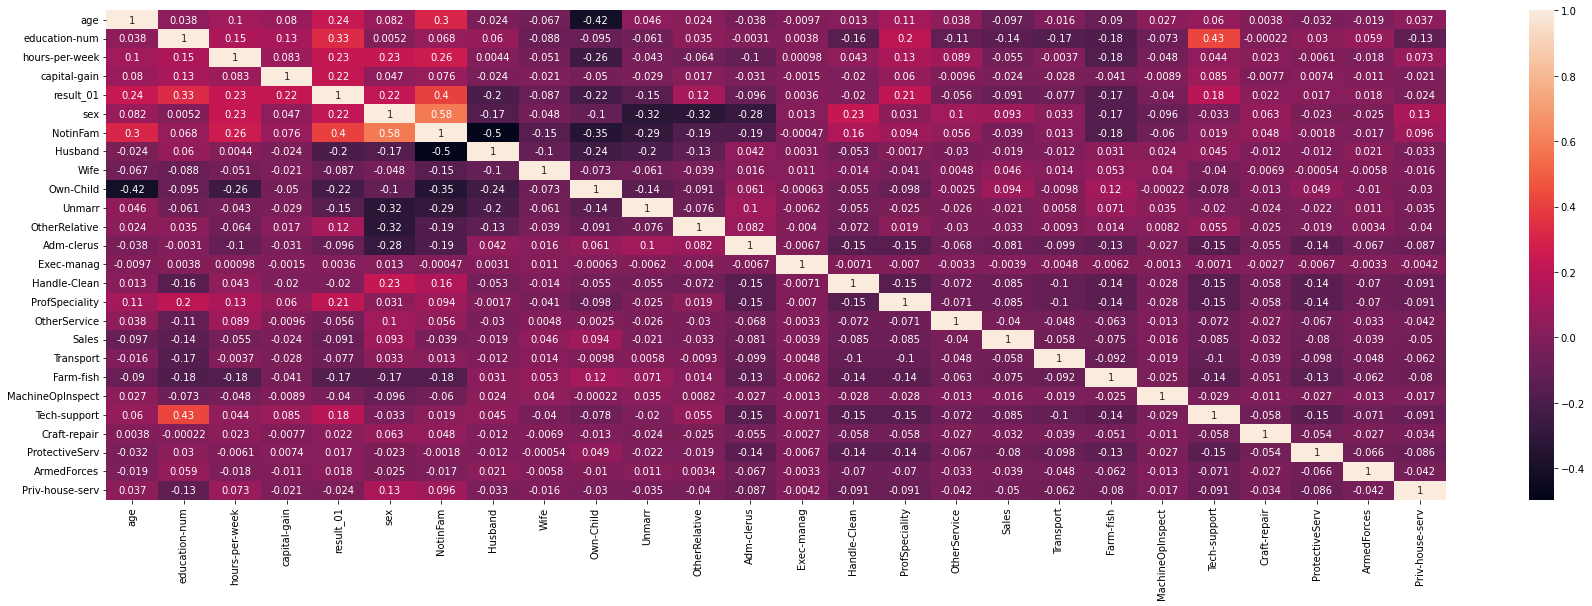

In [261]:
plt.figure(figsize=(30,9))
sns.heatmap(datadefTF.corr(), annot=True)

Vemos aparecer colinealidad entre las nuevas variables creadas (muy alta en 'native-origen', ya no incluida aquí). Suponemos que podrá debilitar el buen funcionamiento de la mayoría de los modelos de clasificación. Las variables originalmente numéricas son las que más peso tienen con la variable target. Reducimos, pues.

**camino alternativo 2 en las transforamciones**

In [262]:
#CAMINO DOS: MISMOS TRATAMIENTOS DE ANTES, pero con inclusión de tanto 'relationship' como 'marital-status' para ver el efecto en las correlaciones, sin inclusión de 'occupaton'

data_transform2 = datadef_rowscolslimp.reset_index(drop=True)

#sex: CATG > NUM
data_transform2["sex"] = LabelEncoder().fit_transform(data_transform2["sex"])

#relationship: CATG > NUM
encod_rel = OneHotEncoder(handle_unknown="ignore")
H = pd.DataFrame(encod_rel.fit_transform(data_transform2[["relationship"]]).toarray())
datatransform2_TF1 = data_transform2.join(H)
datatransform2_TF1 = datatransform2_TF1.rename(columns={0:"NotinFam",1:"Husband",2:"Wife",3:"Own-Child",4:"Unmarr",5:"OtherRelative"})

#marital-status: CATG>NUM
encod_rel2 = OneHotEncoder(handle_unknown="ignore")
H = pd.DataFrame(encod_rel2.fit_transform(datatransform2_TF1[["marital-status"]]).toarray())   #relationship vervangen door marital status
datatransform2_TF2 = datatransform2_TF1.join(H)
datatransform2_TF2 = datatransform2_TF2.rename(columns={0:"Never-Married",1:"Married-Civ-Spouse",2:"Divorced",3:"Married-Spouse-Abs",4:"Separated",5:"Married-AF-Spouse",6:"Widowed"})

#
#print(olddata_TF2.head(1))

#drop columns y desplazar columna target al final
newolddata = datatransform2_TF2.drop(columns = ["result_01", "relationship","marital-status"], axis=1)
finaldata = pd.merge(newolddata, datatransform2_TF2["result_01"],left_index=True, right_index=True)
finaldata.tail(2)

,age,education-num,hours-per-week,capital-gain,workclass,occupation,sex,NotinFam,Husband,Wife,...,Unmarr,OtherRelative,Never-Married,Married-Civ-Spouse,Divorced,Married-Spouse-Abs,Separated,Married-AF-Spouse,Widowed,result_01
46031,44,13,40,5455,Private,Adm-clerical,1,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
46032,35,13,60,0,Self-emp-inc,Exec-managerial,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


<AxesSubplot:>

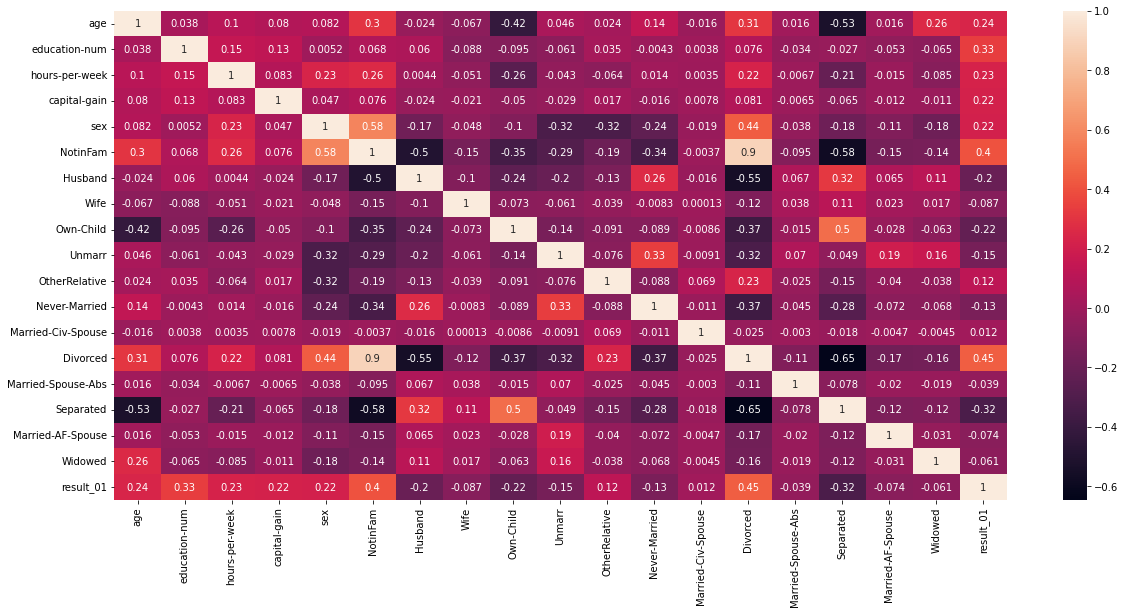

In [263]:
plt.figure(figsize=(20,9))
sns.heatmap(finaldata.corr(), annot=True)

Bastantes relaciones entre las variables de las 2 columans "relationship" y "marital status" => confirmación de conservar solo una (con algunas fusion interna posible:

**camino alternativo 3 en las transformaciones**

In [264]:
#TERCER CAMINO = SEGUNDO CAMINO sin marital status + juntar Husband&Wife en un grupo (dado que sex ya es una columna por separado)
## camino3-parte 1: componer database con datos que más interesantes parecen:

data_transform3 = datadef_rowscolslimp.reset_index(drop=True)
data_transform3 = data_transform3.drop(columns = ["workclass","marital-status","occupation"])

In [265]:
#camino3-parte 2:
#sex: CATG > NUM
data_transform3["sex"] = LabelEncoder().fit_transform(data_transform3["sex"])

In [266]:
#camino3-parte 3:
#relationship: CATG > NUM (no distinction husband wife because already included in 'sex')
data_transform3["relationship"] = data_transform3["relationship"].replace([" Husband"," Wife"], "Spouse")
data_transform3.head(2)

,age,education-num,hours-per-week,capital-gain,result_01,relationship,sex
0,39,13,40,2174,0,Not-in-family,1
1,50,13,13,0,0,Spouse,1


En lo que sigue, no nos ha quedado claro porque al indicar 1:"Spouse" y 4:"OtherRelative", el dataframe presenta los spouses en la columna OtherRelative, y los OtherRelative in "Spouses. Al final hemos solucionado el problema cambiando las etiquetas en el proceso de OneHotEncoder: adjudicar 1 a "OtherRelative" y 4 a "Spouse"

In [267]:
#camino3-parte 4: CATG > NUM
encod_rel = OneHotEncoder(handle_unknown="ignore")
H = pd.DataFrame(encod_rel.fit_transform(data_transform3[["relationship"]]).toarray())
data_transform3_TF1 = data_transform3.join(H)
data_transform3_TF1 = data_transform3_TF1.rename(columns={0:"NotinFam",1:"OtherRelative",2:"Own-Child",3:"Unmarr",4:"Spouse"})
data_transform3_TF1

,age,education-num,hours-per-week,capital-gain,result_01,relationship,sex,NotinFam,OtherRelative,Own-Child,Unmarr,Spouse
0,39,13,40,2174,0,Not-in-family,1,1.0,0.0,0.0,0.0,0.0
1,50,13,13,0,0,Spouse,1,0.0,0.0,0.0,0.0,1.0
2,38,9,40,0,0,Not-in-family,1,1.0,0.0,0.0,0.0,0.0
3,53,7,40,0,0,Spouse,1,0.0,0.0,0.0,0.0,1.0
4,28,13,40,0,0,Spouse,0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
46028,33,13,40,0,0,Own-child,1,0.0,0.0,1.0,0.0,0.0
46029,39,13,36,0,0,Not-in-family,0,1.0,0.0,0.0,0.0,0.0
46030,38,13,50,0,0,Spouse,1,0.0,0.0,0.0,0.0,1.0
46031,44,13,40,5455,0,Own-child,1,0.0,0.0,1.0,0.0,0.0


In [268]:
#camino3-parte 5: drop columnas transformadas (solo "relationship"), "result" de tipo categoría y desplazar "result_01" 
#drop columns y desplazar columna target al final
data_transform3_TF2 = data_transform3_TF1.drop(columns = ["result_01", "relationship"], axis=1)
finaldata_v3 = pd.merge(data_transform3_TF2, data_transform3_TF1["result_01"],left_index=True, right_index=True)
finaldata_v3.head(2)


,age,education-num,hours-per-week,capital-gain,sex,NotinFam,OtherRelative,Own-Child,Unmarr,Spouse,result_01
0,39,13,40,2174,1,1.0,0.0,0.0,0.0,0.0,0
1,50,13,13,0,1,0.0,0.0,0.0,0.0,1.0,0


1. Seguimos teniendo correlaciones bastante 'flojas'. La columna que resulta de la fusión de 'Husband' and 'Wife' ahora sí se ha convertido en la columna con la correlación más alta con el target (0.45).  
2. El segundo feature más importante parece ser el nivel de educación (0.33), seguido por la edad y el número de horas trabajadas a la semana (ambos 0.23).
3. Las noticias menos buenas: observamos todavía unas correlaciones medio-fuertes entre ciertas variables independientes (-0.43, -0.53). Suponemos que esto debe ser una consecuencia por sí de la aplicación de un encoding que transforma las variables de una columna en varias columnas (OneHotEncoder o get_dummies(el último no usado en este trabajo)). Sin haber podido profundizar mucho más en el asunto, la sospecha viene confirmada por https://medium.com/analytics-vidhya/stop-one-hot-encoding-your-categorical-variables-bbb0fba89809. Algunas alternativas se mencionan, pero también con otros efectos colaterales por tener en cuenta. Sin poder dedicar más tiempo en la profundización y las posibles alternativas mejores, en este momento no sabemos muy bien cómo remediar este problema... y suponemos que podrá afectar el rendimiento de por lo menos algunos de los modelos.  
'Own-Child', por ejemplo, está bastante correlacionado con la edad (que va de 17 (min) a 90 (máx) -véase abajo). Interpretamos esta categoría como (casi-)adultos que viven todavía con los padres (https://www.census.gov/programs-surveys/cps/technical-documentation/subject-definitions.html#children). También "Spouse" va bastante correlado con una etiqueta contraria, "NotinFam". Podemos considerar de integrar "Own-Child" en la familía 'stricto senso': así reunimos a todas las personas con una relación genética que viven en el mismo hogar, y esperamos contribuir a reducir el problema de colinearidad. Pero tal vez aumentemos también el grado de colinearidad con las demás columnas que han resultado del OneHotEncoding. Vamos a averiguar si es mejor o no incluir "Own-child" dentro de una "familia (con relaciones genéticas en primera línea)" en el sentido estricto de la palabra.

<AxesSubplot:>

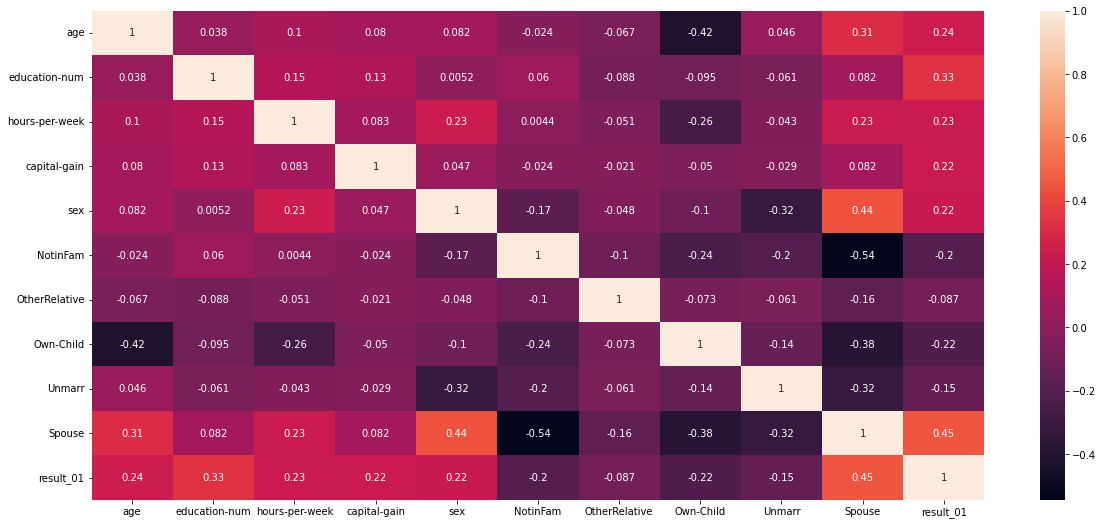

In [269]:
plt.figure(figsize=(20,9))
sns.heatmap(finaldata_v3.corr(), annot=True)

In [270]:
print(data["age"].min())
print(data["age"].max())

17
90


**cuarto camino alternativo (que no vamos a retener)**

In [271]:
#CAMINO 4: volver al output de CAMINO3-parte 3
data_transform4 = data_transform3
data_transform4["relationship"] = data_transform4["relationship"].replace(["Spouse", " Own-child"], "StrictFam")  #el haber escrito "Child con mayúscula nos ha causado problemas después con el OneHotEncoder, que lógicamente´daba una columna más de lo deseado..."
data_transform4["relationship"].value_counts()

StrictFam          27850
 Not-in-family     11916
 Unmarried          4867
 Other-relative     1400
Name: relationship, dtype: int64

In [272]:
#CAMINO 4 - parte 4:
encod_rel = OneHotEncoder(handle_unknown="ignore")
H = pd.DataFrame(encod_rel.fit_transform(data_transform4[["relationship"]]).toarray())
data_transform4_TF1 = data_transform4.join(H)
data_transform4_TF1 = data_transform4_TF1.rename(columns={0:"NotinFam",1:"OtherRelative",2:"Unmarr",3:"StrictFam"})
data_transform4_TF1

,age,education-num,hours-per-week,capital-gain,result_01,relationship,sex,NotinFam,OtherRelative,Unmarr,StrictFam
0,39,13,40,2174,0,Not-in-family,1,1.0,0.0,0.0,0.0
1,50,13,13,0,0,StrictFam,1,0.0,0.0,0.0,1.0
2,38,9,40,0,0,Not-in-family,1,1.0,0.0,0.0,0.0
3,53,7,40,0,0,StrictFam,1,0.0,0.0,0.0,1.0
4,28,13,40,0,0,StrictFam,0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
46028,33,13,40,0,0,StrictFam,1,0.0,0.0,0.0,1.0
46029,39,13,36,0,0,Not-in-family,0,1.0,0.0,0.0,0.0
46030,38,13,50,0,0,StrictFam,1,0.0,0.0,0.0,1.0
46031,44,13,40,5455,0,StrictFam,1,0.0,0.0,0.0,1.0


In [273]:
#verificación rápida si hay efectivamente valores en la columna "OtherRelative"
data_transform4_TF1["OtherRelative"].value_counts()

0.0    44633
1.0     1400
Name: OtherRelative, dtype: int64

In [274]:
#CAMINO 4 - parte 5: drop columnas transformadas (solo "relationship"), "result" de tipo categoría y desplazar "result_01" a la última posición:
#drop columns y desplazar columna target al final:
data_transform4_TF2 = data_transform4_TF1.drop(columns = ["result_01","relationship"])
finaldata_v4 = pd.merge(data_transform4_TF2, data_transform4_TF1["result_01"],left_index=True, right_index=True)
finaldata_v4

,age,education-num,hours-per-week,capital-gain,sex,NotinFam,OtherRelative,Unmarr,StrictFam,result_01
0,39,13,40,2174,1,1.0,0.0,0.0,0.0,0
1,50,13,13,0,1,0.0,0.0,0.0,1.0,0
2,38,9,40,0,1,1.0,0.0,0.0,0.0,0
3,53,7,40,0,1,0.0,0.0,0.0,1.0,0
4,28,13,40,0,0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
46028,33,13,40,0,1,0.0,0.0,0.0,1.0,0
46029,39,13,36,0,0,1.0,0.0,0.0,0.0,0
46030,38,13,50,0,1,0.0,0.0,0.0,1.0,0
46031,44,13,40,5455,1,0.0,0.0,0.0,1.0,0


<AxesSubplot:>

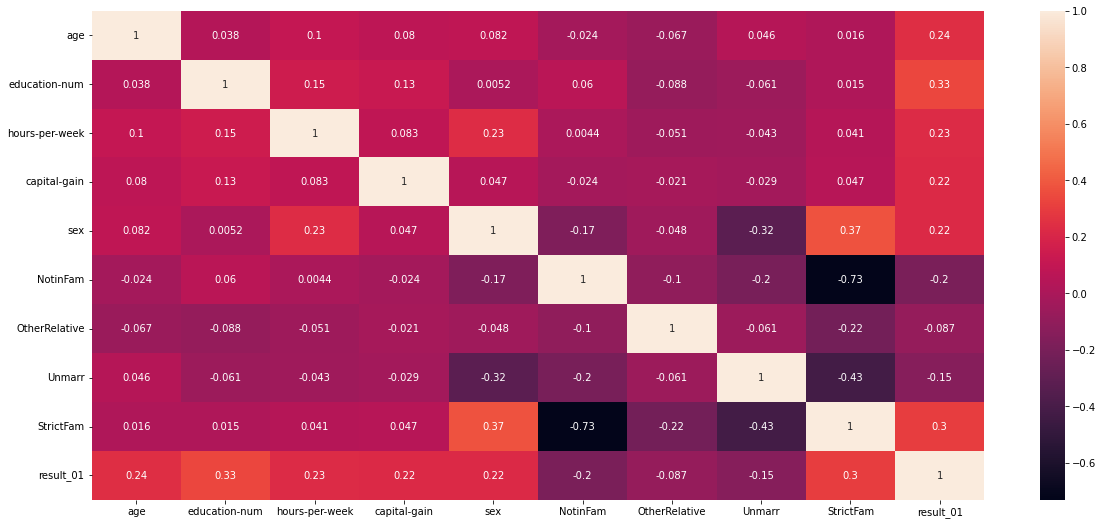

In [275]:
plt.figure(figsize=(20,9))
sns.heatmap(finaldata_v4.corr(), annot=True)

Tal como sospechábamos, el grado de colinearidad entre algunas variables independientes llega a valores más altos, ej. "NotinFam" vs. "StrictFam" (-0.73) (= no deseado). Por otro lado, la correlación entre "StrictFam", compuesto nuevo, y nuestra target ha bajado (= no deseado). Concluimos que más vale quedarnos con la composición anterior del dataset: camino 3.

**definimos el dataset que usaremos como input en el modelling**

In [276]:
data_proc = finaldata_v3
data_proc

,age,education-num,hours-per-week,capital-gain,sex,NotinFam,OtherRelative,Own-Child,Unmarr,Spouse,result_01
0,39,13,40,2174,1,1.0,0.0,0.0,0.0,0.0,0
1,50,13,13,0,1,0.0,0.0,0.0,0.0,1.0,0
2,38,9,40,0,1,1.0,0.0,0.0,0.0,0.0,0
3,53,7,40,0,1,0.0,0.0,0.0,0.0,1.0,0
4,28,13,40,0,0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
46028,33,13,40,0,1,0.0,0.0,1.0,0.0,0.0,0
46029,39,13,36,0,0,1.0,0.0,0.0,0.0,0.0,0
46030,38,13,50,0,1,0.0,0.0,0.0,0.0,1.0,0
46031,44,13,40,5455,1,0.0,0.0,1.0,0.0,0.0,0


Renombramos las columnas que provienen de 'relationship' para luego poder identificar más rápido el ámbito de su contenido:

In [277]:
data_proc.columns

Index(['age', 'education-num', 'hours-per-week', 'capital-gain', 'sex',
       'NotinFam', 'OtherRelative', 'Own-Child', 'Unmarr', 'Spouse',
       'result_01'],
      dtype='object')

In [278]:
data_proc = data_proc.rename(columns={"NotinFam":"REL-NotInFam", "OtherRelative":"REL-OtherRelat", "Own-Child":"REL-OwnChild","Unmarr":"REL-Unmarr","Spouse":"REL-Spouse"})

In [279]:
data_proc

,age,education-num,hours-per-week,capital-gain,sex,REL-NotInFam,REL-OtherRelat,REL-OwnChild,REL-Unmarr,REL-Spouse,result_01
0,39,13,40,2174,1,1.0,0.0,0.0,0.0,0.0,0
1,50,13,13,0,1,0.0,0.0,0.0,0.0,1.0,0
2,38,9,40,0,1,1.0,0.0,0.0,0.0,0.0,0
3,53,7,40,0,1,0.0,0.0,0.0,0.0,1.0,0
4,28,13,40,0,0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
46028,33,13,40,0,1,0.0,0.0,1.0,0.0,0.0,0
46029,39,13,36,0,0,1.0,0.0,0.0,0.0,0.0,0
46030,38,13,50,0,1,0.0,0.0,0.0,0.0,1.0,0
46031,44,13,40,5455,1,0.0,0.0,1.0,0.0,0.0,0


## 4.3.1. Bajar peso del dataset si posible

Todos nuestros valores caben en el rango previsto por int32 => cambiamos el dtype de cada uno de las variables que todavía no lo tiene.

In [280]:
data_proc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46033 entries, 0 to 46032
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             46033 non-null  int64  
 1   education-num   46033 non-null  int64  
 2   hours-per-week  46033 non-null  int64  
 3   capital-gain    46033 non-null  int64  
 4   sex             46033 non-null  int32  
 5   REL-NotInFam    46033 non-null  float64
 6   REL-OtherRelat  46033 non-null  float64
 7   REL-OwnChild    46033 non-null  float64
 8   REL-Unmarr      46033 non-null  float64
 9   REL-Spouse      46033 non-null  float64
 10  result_01       46033 non-null  int32  
dtypes: float64(5), int32(2), int64(4)
memory usage: 3.5 MB


In [281]:
data_proc.columns

Index(['age', 'education-num', 'hours-per-week', 'capital-gain', 'sex',
       'REL-NotInFam', 'REL-OtherRelat', 'REL-OwnChild', 'REL-Unmarr',
       'REL-Spouse', 'result_01'],
      dtype='object')

In [282]:
for col in data_proc.columns:
    data_proc[col] = data_proc[col].astype(int)
data_proc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46033 entries, 0 to 46032
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             46033 non-null  int32
 1   education-num   46033 non-null  int32
 2   hours-per-week  46033 non-null  int32
 3   capital-gain    46033 non-null  int32
 4   sex             46033 non-null  int32
 5   REL-NotInFam    46033 non-null  int32
 6   REL-OtherRelat  46033 non-null  int32
 7   REL-OwnChild    46033 non-null  int32
 8   REL-Unmarr      46033 non-null  int32
 9   REL-Spouse      46033 non-null  int32
 10  result_01       46033 non-null  int32
dtypes: int32(11)
memory usage: 1.9 MB


Hemos conseguido que nuestro dataset coja casi la mitad de memoria de la versión anterior.  
<br>
**data_proc = dataset que servirá de input para el ML**

In [283]:
data_proc.to_csv("../data/processed/dataset_input_ML.csv", index=False)

# 4.2. FASE 2 - PREPARACIÓN DEL DATASET PARA EL MODELLING

VEASE EN JUPYTER NOTEBOOK-MODELOS